In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
pd.set_option("display.float.format",lambda x: "%.2f"%x)
pd.set_option("display.width",500)

In [2]:
df = pd.read_csv("dataset/hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N


In [4]:
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.00,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.00,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.00,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.00,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.00,A


In [5]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'], dtype='object')

In [6]:
df.columns = [col.upper() for col in df.columns]

In [7]:
df.shape

(322, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ATBAT      322 non-null    int64  
 1   HITS       322 non-null    int64  
 2   HMRUN      322 non-null    int64  
 3   RUNS       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   WALKS      322 non-null    int64  
 6   YEARS      322 non-null    int64  
 7   CATBAT     322 non-null    int64  
 8   CHITS      322 non-null    int64  
 9   CHMRUN     322 non-null    int64  
 10  CRUNS      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWALKS     322 non-null    int64  
 13  LEAGUE     322 non-null    object 
 14  DIVISION   322 non-null    object 
 15  PUTOUTS    322 non-null    int64  
 16  ASSISTS    322 non-null    int64  
 17  ERRORS     322 non-null    int64  
 18  SALARY     263 non-null    float64
 19  NEWLEAGUE  322 non-null    object 
dtypes: float64

In [9]:
df.describe()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,PUTOUTS,ASSISTS,ERRORS,SALARY
count,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,263.00
mean,380.93,101.02,10.77,50.91,48.03,38.74,7.44,2648.68,717.57,69.49,358.80,330.12,260.24,288.94,106.91,8.04,535.93
std,153.40,46.45,8.71,26.02,26.17,21.64,4.93,2324.21,654.47,86.27,334.11,333.22,267.06,280.70,136.85,6.37,451.12
min,16.00,1.00,0.00,0.00,0.00,0.00,1.00,19.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,67.50
25%,255.25,64.00,4.00,30.25,28.00,22.00,4.00,816.75,209.00,14.00,100.25,88.75,67.25,109.25,7.00,3.00,190.00
50%,379.50,96.00,8.00,48.00,44.00,35.00,6.00,1928.00,508.00,37.50,247.00,220.50,170.50,212.00,39.50,6.00,425.00
75%,512.00,137.00,16.00,69.00,64.75,53.00,11.00,3924.25,1059.25,90.00,526.25,426.25,339.25,325.00,166.00,11.00,750.00
max,687.00,238.00,40.00,130.00,121.00,105.00,24.00,14053.00,4256.00,548.00,2165.00,1659.00,1566.00,1378.00,492.00,32.00,2460.00


In [10]:
df.isnull().sum()

ATBAT         0
HITS          0
HMRUN         0
RUNS          0
RBI           0
WALKS         0
YEARS         0
CATBAT        0
CHITS         0
CHMRUN        0
CRUNS         0
CRBI          0
CWALKS        0
LEAGUE        0
DIVISION      0
PUTOUTS       0
ASSISTS       0
ERRORS        0
SALARY       59
NEWLEAGUE     0
dtype: int64

In [11]:
def grab_columns(df, cat = 10, car = 20):
    
    cat_col = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if (df[col].dtypes != "O") & (df[col].nunique() < cat)]
    cat_but_car = [col for col in df.columns if (df[col].dtypes == "O") & (df[col].nunique() > car)]
    
    cat_col = cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]
    
    num_col = [col for col in df.columns if (df[col].dtypes != "O") & (col not in cat_col)]
    
    
    return cat_col, num_col, cat_but_car

In [12]:
cat_col, num_col, cat_but_car = grab_columns(df)

In [13]:
cat_col

['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [14]:
num_col

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'PUTOUTS',
 'ASSISTS',
 'ERRORS',
 'SALARY']

In [15]:
cat_but_car

[]

# Numerical Columns Analysis

In [16]:
def num_col_analysis(df, Ncol, plot = False):
    qua = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
    
    print(df[Ncol].describe(qua).T)
    
    if plot:
        df[Ncol].hist(bins = 25)
        plt.xlabel(Ncol)
        plt.title(Ncol)
        plt.show(block = True)

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
max     687.00
Name: ATBAT, dtype: float64


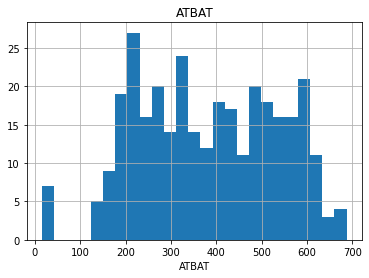

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
max     238.00
Name: HITS, dtype: float64


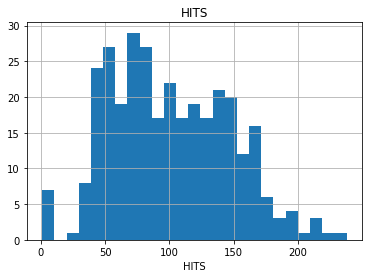

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
max      40.00
Name: HMRUN, dtype: float64


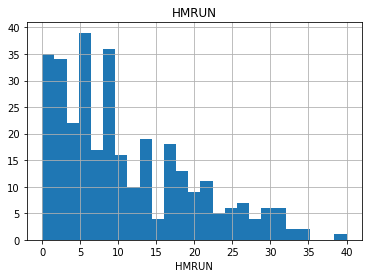

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
max     130.00
Name: RUNS, dtype: float64


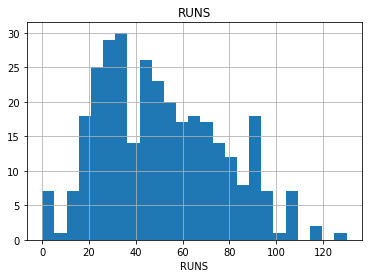

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
max     121.00
Name: RBI, dtype: float64


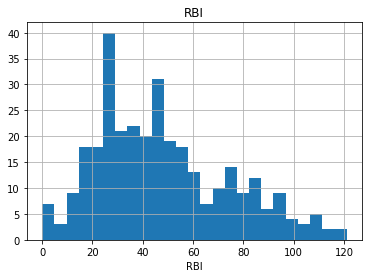

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
max     105.00
Name: WALKS, dtype: float64


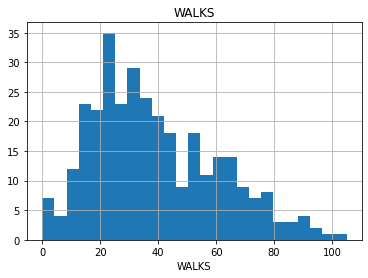

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
max      24.00
Name: YEARS, dtype: float64


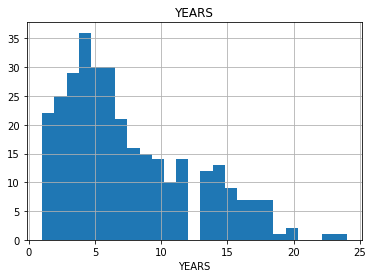

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
max     14053.00
Name: CATBAT, dtype: float64


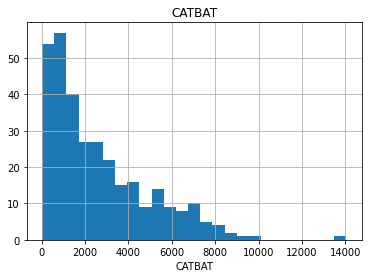

count    322.00
mean     717.57
std      654.47
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
max     4256.00
Name: CHITS, dtype: float64


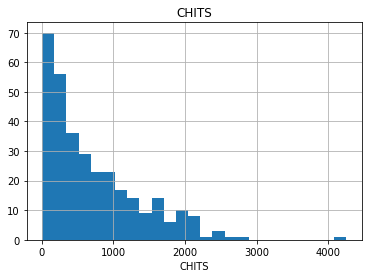

count   322.00
mean     69.49
std      86.27
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
max     548.00
Name: CHMRUN, dtype: float64


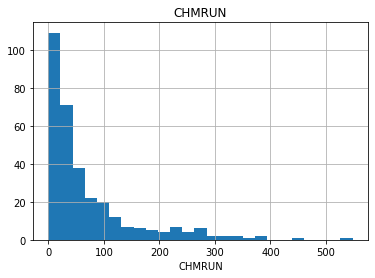

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
max     2165.00
Name: CRUNS, dtype: float64


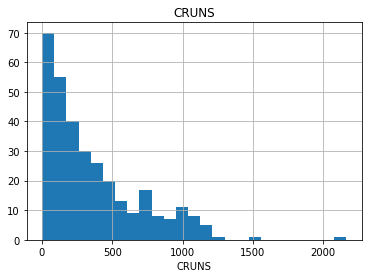

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
max     1659.00
Name: CRBI, dtype: float64


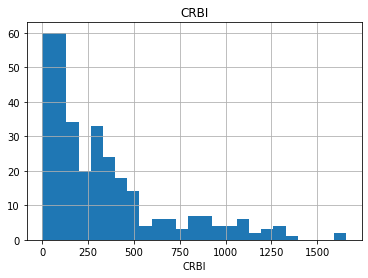

count    322.00
mean     260.24
std      267.06
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
max     1566.00
Name: CWALKS, dtype: float64


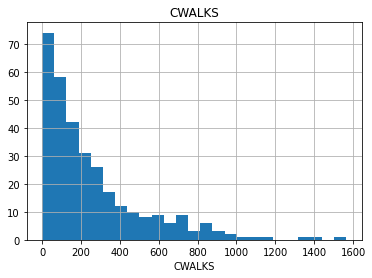

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
max     1378.00
Name: PUTOUTS, dtype: float64


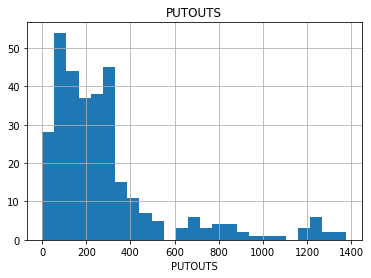

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
max     492.00
Name: ASSISTS, dtype: float64


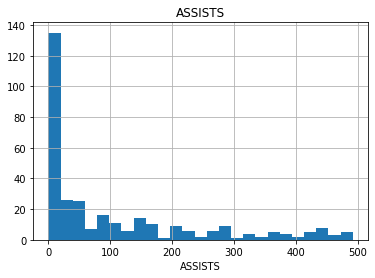

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
max      32.00
Name: ERRORS, dtype: float64


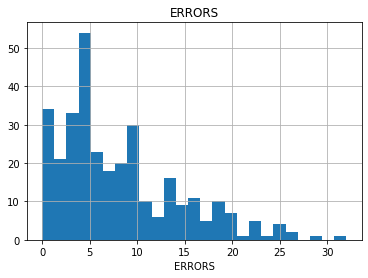

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
max     2460.00
Name: SALARY, dtype: float64


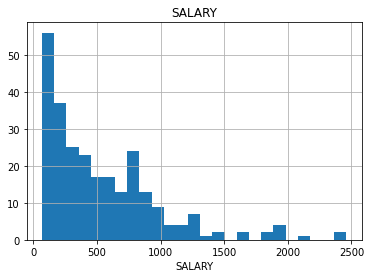

In [17]:
for col in num_col:
    num_col_analysis(df,col,plot = True)

# Categorical Columns Analysis

In [18]:
def cat_col_analysis(df, col, plot = False):
    print(pd.DataFrame({col:df[col].value_counts(),"Ratio":100*df[col].value_counts()/len(df)}))
    
    if plot:
        sns.countplot(x= df[col], data = df)
        plt.xticks(rotation = 90)
        plt.show()

In [19]:
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),"TARGET_COUNT":dataframe.groupby(categorical_col)[target].count()}),end="\n\n\n")
for col in cat_col:
    target_summary_with_cat(df,"SALARY",col)

        TARGET_MEAN  TARGET_COUNT
LEAGUE                           
A            542.00           139
N            529.12           124


          TARGET_MEAN  TARGET_COUNT
DIVISION                           
E              624.27           129
W              450.88           134


           TARGET_MEAN  TARGET_COUNT
NEWLEAGUE                           
A               537.11           141
N               534.55           122




   LEAGUE  Ratio
A     175  54.35
N     147  45.65


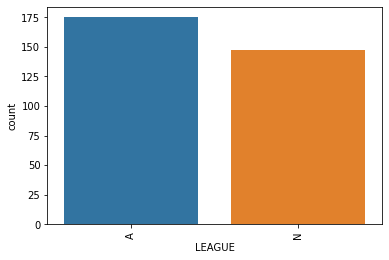

   DIVISION  Ratio
W       165  51.24
E       157  48.76


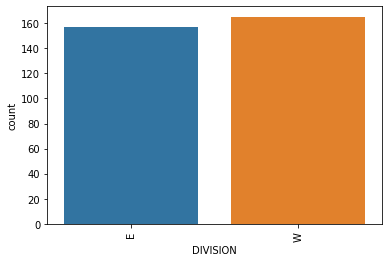

   NEWLEAGUE  Ratio
A        176  54.66
N        146  45.34


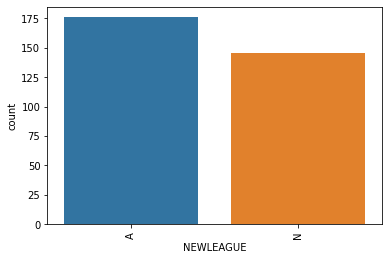

In [20]:
for col in cat_col:
    cat_col_analysis(df,col,plot = True)

# Check Outlier Values

In [21]:
def outlier_thresholds(df, col, qua1 = 0.25, qua3 = 0.75):
    q1 = df[col].quantile(qua1)
    q3 = df[col].quantile(qua3)
    
    ıqr = q3 - q1
    
    low = q1 - 1.5*ıqr
    up = q3 + 1.5*ıqr
    
    return low,up

In [22]:
def outlier_boxplot(df,col):
    low, up = outlier_thresholds(df,col)
    
    if check_outlier(df,col):
        sns.boxplot(x = df[col])
        plt.title(col)
        plt.show(block = True)
        print("Low: {} Up: {}".format(low,up))
        print("#######################################")

In [23]:
def check_outlier(df,col):
    low, up = outlier_thresholds(df,col)
    
    if((df[col]< low) | (df[col] > up)).any(axis = None):
        return True
    else:
        return False

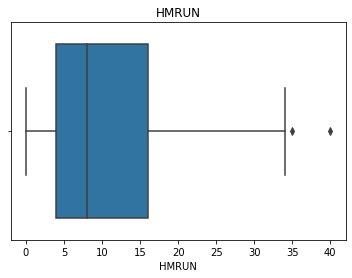

Low: -14.0 Up: 34.0
#######################################


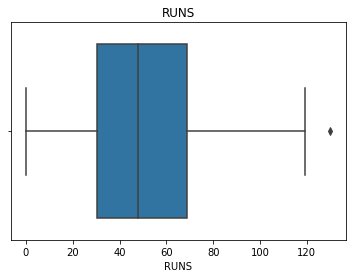

Low: -27.875 Up: 127.125
#######################################


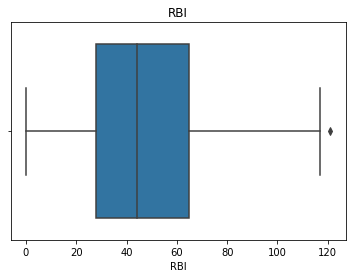

Low: -27.125 Up: 119.875
#######################################


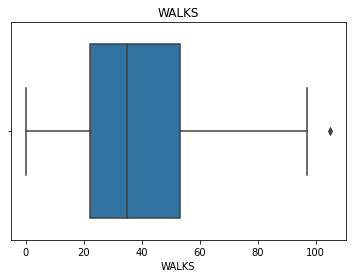

Low: -24.5 Up: 99.5
#######################################


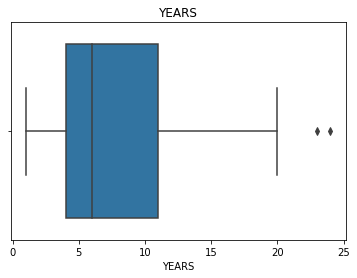

Low: -6.5 Up: 21.5
#######################################


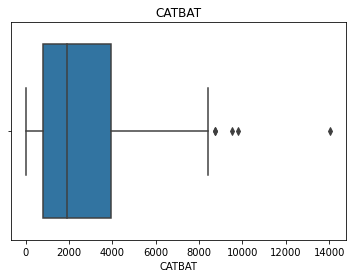

Low: -3844.5 Up: 8585.5
#######################################


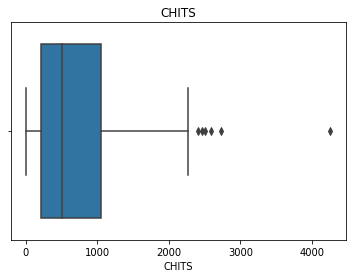

Low: -1066.375 Up: 2334.625
#######################################


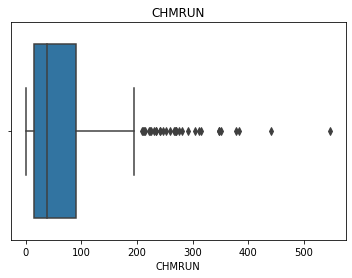

Low: -100.0 Up: 204.0
#######################################


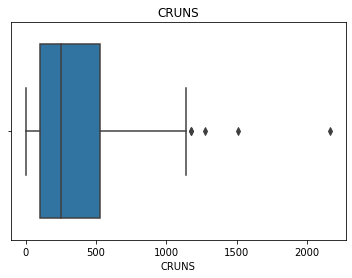

Low: -538.75 Up: 1165.25
#######################################


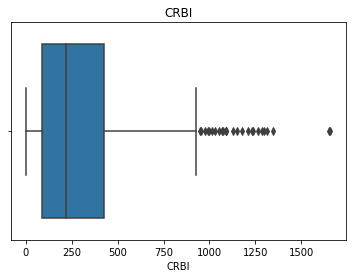

Low: -417.5 Up: 932.5
#######################################


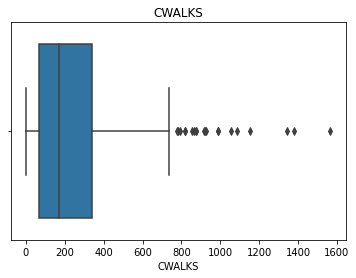

Low: -340.75 Up: 747.25
#######################################


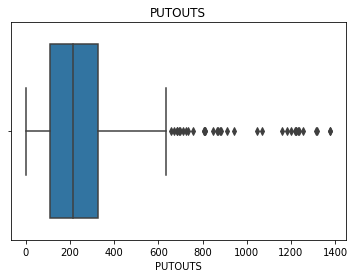

Low: -214.375 Up: 648.625
#######################################


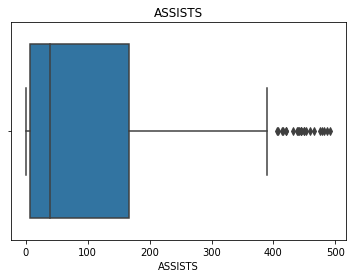

Low: -231.5 Up: 404.5
#######################################


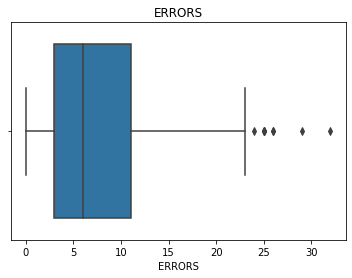

Low: -9.0 Up: 23.0
#######################################


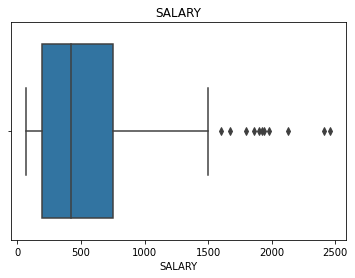

Low: -650.0 Up: 1590.0
#######################################


In [24]:
for col in num_col:
    outlier_boxplot(df,col)

In [25]:
def outlier_values_index(df,col):
    low, up = outlier_thresholds(df,col)
    
    if check_outlier(df,col) == True:
        return df[(df[col] > up) | (df[col] < low)].index
    

In [26]:
for col in num_col:
    print(col,"\n",outlier_values_index(df,col))

ATBAT 
 None
HITS 
 None
HMRUN 
 Int64Index([80, 136], dtype='int64')
RUNS 
 Int64Index([248], dtype='int64')
RBI 
 Int64Index([141], dtype='int64')
WALKS 
 Int64Index([313], dtype='int64')
YEARS 
 Int64Index([236, 302], dtype='int64')
CATBAT 
 Int64Index([121, 236, 249, 278, 302], dtype='int64')
CHITS 
 Int64Index([24, 236, 249, 278, 302, 306], dtype='int64')
CHMRUN 
 Int64Index([3, 9, 30, 32, 38, 48, 50, 65, 72, 73, 74, 80, 84, 86, 96, 100, 104, 110, 112, 114, 117, 120, 121, 125, 163, 195, 196, 243, 249, 278, 302, 306], dtype='int64')
CRUNS 
 Int64Index([73, 121, 236, 249, 302], dtype='int64')
CRBI 
 Int64Index([16, 24, 48, 50, 65, 73, 74, 80, 86, 96, 100, 110, 112, 114, 117, 120, 121, 132, 143, 163, 236, 243, 249, 278, 302, 306], dtype='int64')
CWALKS 
 Int64Index([9, 29, 30, 61, 73, 74, 81, 88, 96, 120, 121, 143, 179, 236, 243, 249, 292, 302, 306, 318], dtype='int64')
PUTOUTS 
 Int64Index([2, 4, 18, 22, 24, 27, 32, 48, 73, 82, 100, 103, 111, 112, 113, 126, 145, 170, 179, 180, 189, 

### Replace with outlier thresholds

In [27]:
def replace_with_outlier_thresholds(df,col):
    low, up = outlier_thresholds(df,col)
    
    if check_outlier(df,col) == True:
        df.loc[df[col] < low, col] = low
        df.loc[df[col] > up, col] = up
        
    return df

In [28]:
for col in num_col:
    df = replace_with_outlier_thresholds(df,col)

In [29]:
for col in num_col:
    print(col,check_outlier(df,col))

ATBAT False
HITS False
HMRUN False
RUNS False
RBI False
WALKS False
YEARS False
CATBAT False
CHITS False
CHMRUN False
CRUNS False
CRBI False
CWALKS False
PUTOUTS False
ASSISTS False
ERRORS False
SALARY False


# Check Na Values

In [30]:
def check_na_values(df,col):
    
    return df[col].isnull().any()

In [31]:
for col in num_col:
    print(col,"-",check_na_values(df,col))

ATBAT - False
HITS - False
HMRUN - False
RUNS - False
RBI - False
WALKS - False
YEARS - False
CATBAT - False
CHITS - False
CHMRUN - False
CRUNS - False
CRBI - False
CWALKS - False
PUTOUTS - False
ASSISTS - False
ERRORS - False
SALARY - True


### Drop na values

In [32]:
df = df.dropna()

In [33]:
for col in df.columns:
    print(col,check_na_values(df,col))

ATBAT False
HITS False
HMRUN False
RUNS False
RBI False
WALKS False
YEARS False
CATBAT False
CHITS False
CHMRUN False
CRUNS False
CRBI False
CWALKS False
LEAGUE False
DIVISION False
PUTOUTS False
ASSISTS False
ERRORS False
SALARY False
NEWLEAGUE False


# Corr Analysis

In [34]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

def target_correlation_matrix(dataframe, corr_th=0.5, target="Salary"):
    """
    Bağımlı değişken ile verilen threshold değerinin üzerindeki korelasyona sahip değişkenleri getirir.
    :param dataframe:
    :param corr_th: eşik değeri
    :param target:  bağımlı değişken ismi
    :return:
    """
    corr = dataframe.corr()
    corr_th = corr_th
    try:
        filter = np.abs(corr[target]) > corr_th
        corr_features = corr.columns[filter].tolist()
        sns.clustermap(dataframe[corr_features].corr(), annot=True, fmt=".2f")
        plt.show()
        return corr_features
    except:
        print("Yüksek threshold değeri, corr_th değerinizi düşürün!")

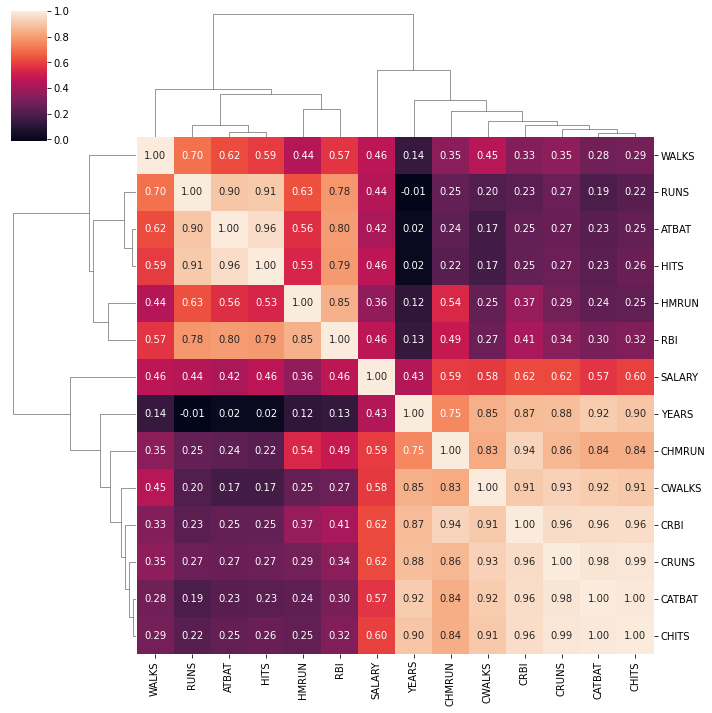

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'SALARY']

In [35]:
target_correlation_matrix(df,corr_th=0.3,target = "SALARY")

C:\Users\90539\AppData\Local\Temp\ipykernel_12360\2369508261.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


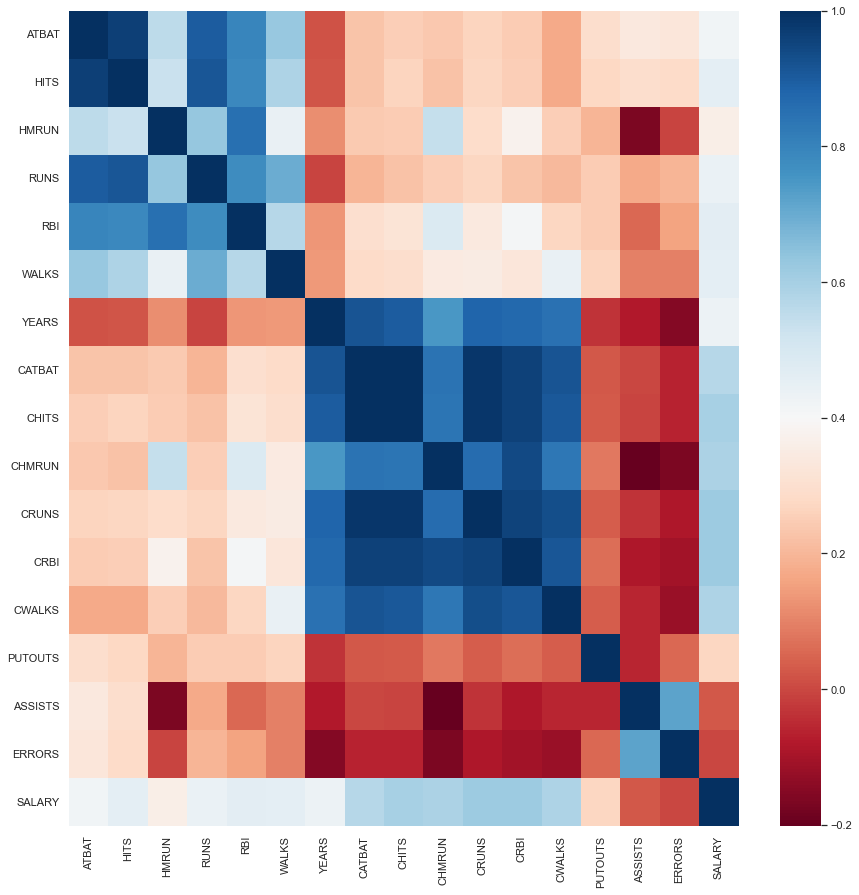

['HITS', 'RUNS', 'CATBAT', 'CHITS', 'CRUNS', 'CRBI', 'CWALKS']

In [36]:
high_correlated_cols(df, plot=True, corr_th=0.90)

# Add new feature

In [37]:
#Carrer Rates
df["HIT_RATIO"] = df["HITS"] / df["CHITS"]
df["HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
df["ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
df["RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
df["WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["RBI_RATIO"] = df["RBI"] / df["CRBI"]

#Transfer
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"),"TRANSFER"] = "Stand_A"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"),"TRANSFER"] = "Stand_N"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"),"TRANSFER"] = "A_N"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"),"TRANSFER"] = "N_A"

#Experience
df.loc[(df["YEARS"] < 2),"EXPERIENCE"] = "Junior_Player"
df.loc[(df["YEARS"] >= 2) & (df["YEARS"] < 5),"EXPERIENCE"] = "Mid_Player"
df.loc[(df["YEARS"] >= 5) & (df["YEARS"] < 10),"EXPERIENCE"] = "Senior_Player"
df.loc[(df["YEARS"] >= 10),"EXPERIENCE"] = "Expert_Player"

#Division
df.loc[(df["EXPERIENCE"] == "Junior_Player") & (df["DIVISION"] == "W"),"EXP_DIV_CAT"] = "Junior_West"
df.loc[(df["EXPERIENCE"] == "Junior_Player") & (df["DIVISION"] == "E"),"EXP_DIV_CAT"] = "Junior_East"
df.loc[(df["EXPERIENCE"] == "Mid_Player") & (df["DIVISION"] == "W"), "EXP_DIV_CAT"] = "Mid_West"
df.loc[(df["EXPERIENCE"] == "Mid_Player") & (df["DIVISION"] == "E"), "EXP_DIV_CAT"] = "Mid_East"
df.loc[(df["EXPERIENCE"] == "Senior_Player") & (df["DIVISION"] == "W"), "EXP_DIV_CAT"] = "Senior_West"
df.loc[(df["EXPERIENCE"] == "Senior_Player") & (df["DIVISION"] == "E"), "EXP_DIV_CAT"] = "Senior_East"
df.loc[(df["EXPERIENCE"] == "Expert_Player") & (df["DIVISION"] == "W"),"EXP_DIV_CAT"] = "Expert_West"
df.loc[(df["EXPERIENCE"] == "Expert_Player") & (df["DIVISION"] == "E"),"EXP_DIV_CAT"] = "Expert_East"

#Avg
df["ATBAT_PER_YEAR"] = df["ATBAT"] / df["YEARS"]
df["HITS_PER_YEAR"] = df["HITS"] / df["YEARS"]
df["HMRUN_PER_YEAR"] = df["HMRUN"] / df["YEARS"]
df["RUNS_PER_YEAR"] = df["RUNS"] / df["YEARS"]
df["RBI_PER_YEAR"] = df["RBI"] / df["YEARS"]
df["WALKS_PER_YEAR"] = df["WALKS"] / df["YEARS"]

In [38]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,HIT_RATIO,HMRUN_RATIO,ATBAT_RATIO,RUNS_RATIO,WALKS_RATIO,RBI_RATIO,TRANSFER,EXPERIENCE,EXP_DIV_CAT,ATBAT_PER_YEAR,HITS_PER_YEAR,HMRUN_PER_YEAR,RUNS_PER_YEAR,RBI_PER_YEAR,WALKS_PER_YEAR
1,315,81,7,24.00,38.00,39.00,14.00,3449.00,835.00,69,321.00,414.00,375.00,N,W,632.00,43.00,10,475.00,N,0.10,0.10,0.09,0.07,0.10,0.09,Stand_N,Expert_Player,Expert_West,22.50,5.79,0.50,1.71,2.71,2.79
2,479,130,18,66.00,72.00,76.00,3.00,1624.00,457.00,63,224.00,266.00,263.00,A,W,648.62,82.00,14,480.00,A,0.28,0.29,0.29,0.29,0.29,0.27,Stand_A,Mid_Player,Mid_West,159.67,43.33,6.00,22.00,24.00,25.33
3,496,141,20,65.00,78.00,37.00,11.00,5628.00,1575.00,204,828.00,838.00,354.00,N,E,200.00,11.00,3,500.00,N,0.09,0.10,0.09,0.08,0.10,0.09,Stand_N,Expert_Player,Expert_East,45.09,12.82,1.82,5.91,7.09,3.36
4,321,87,10,39.00,42.00,30.00,2.00,396.00,101.00,12,48.00,46.00,33.00,N,E,648.62,40.00,4,91.50,N,0.86,0.83,0.81,0.81,0.91,0.91,Stand_N,Mid_Player,Mid_East,160.50,43.50,5.00,19.50,21.00,15.00
5,594,169,4,74.00,51.00,35.00,11.00,4408.00,1133.00,19,501.00,336.00,194.00,A,W,282.00,404.50,23,750.00,A,0.15,0.21,0.13,0.15,0.18,0.15,Stand_A,Expert_Player,Expert_West,54.00,15.36,0.36,6.73,4.64,3.18


In [39]:
df.columns

Index(['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT', 'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'LEAGUE', 'DIVISION', 'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY', 'NEWLEAGUE', 'HIT_RATIO', 'HMRUN_RATIO', 'ATBAT_RATIO', 'RUNS_RATIO', 'WALKS_RATIO', 'RBI_RATIO', 'TRANSFER', 'EXPERIENCE', 'EXP_DIV_CAT', 'ATBAT_PER_YEAR', 'HITS_PER_YEAR', 'HMRUN_PER_YEAR', 'RUNS_PER_YEAR', 'RBI_PER_YEAR', 'WALKS_PER_YEAR'], dtype='object')

In [40]:
df.shape

(263, 35)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATBAT           263 non-null    int64  
 1   HITS            263 non-null    int64  
 2   HMRUN           263 non-null    int64  
 3   RUNS            263 non-null    float64
 4   RBI             263 non-null    float64
 5   WALKS           263 non-null    float64
 6   YEARS           263 non-null    float64
 7   CATBAT          263 non-null    float64
 8   CHITS           263 non-null    float64
 9   CHMRUN          263 non-null    int64  
 10  CRUNS           263 non-null    float64
 11  CRBI            263 non-null    float64
 12  CWALKS          263 non-null    float64
 13  LEAGUE          263 non-null    object 
 14  DIVISION        263 non-null    object 
 15  PUTOUTS         263 non-null    float64
 16  ASSISTS         263 non-null    float64
 17  ERRORS          263 non-null    int

In [42]:
df.describe()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,PUTOUTS,ASSISTS,ERRORS,SALARY,HIT_RATIO,HMRUN_RATIO,ATBAT_RATIO,RUNS_RATIO,WALKS_RATIO,RBI_RATIO,ATBAT_PER_YEAR,HITS_PER_YEAR,HMRUN_PER_YEAR,RUNS_PER_YEAR,RBI_PER_YEAR,WALKS_PER_YEAR
count,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,260.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00
mean,403.64,107.83,11.60,54.73,51.48,41.09,7.30,2632.02,712.52,62.27,356.05,312.76,245.36,254.73,115.11,8.48,520.03,0.32,0.35,0.32,0.32,0.33,0.34,93.09,24.56,2.58,12.60,11.43,9.13
std,147.31,45.13,8.69,25.51,25.87,21.66,4.76,2192.33,611.77,61.61,311.53,277.23,219.49,182.46,136.88,6.31,400.91,0.29,0.31,0.29,0.28,0.29,0.30,92.65,24.59,3.65,13.34,12.48,9.86
min,19.00,1.00,0.00,0.00,0.00,0.00,1.00,19.00,4.00,0.00,2.00,3.00,1.00,0.00,0.00,0.00,67.50,0.01,0.00,0.02,0.00,0.00,0.00,6.68,0.50,0.00,0.00,0.00,0.00
25%,282.50,71.50,5.00,33.50,30.00,23.00,4.00,842.50,212.00,15.00,105.50,95.00,71.00,113.50,8.00,3.00,190.00,0.11,0.13,0.11,0.10,0.12,0.12,36.61,9.66,0.67,4.93,4.22,3.24
50%,413.00,103.00,9.00,52.00,47.00,37.00,6.00,1931.00,516.00,40.00,250.00,230.00,174.00,224.00,45.00,7.00,425.00,0.20,0.24,0.21,0.22,0.22,0.22,65.11,16.40,1.40,8.09,7.62,6.29
75%,526.00,141.50,18.00,73.00,71.00,57.00,10.00,3890.50,1054.00,92.50,497.50,424.50,328.50,322.50,192.00,13.00,750.00,0.44,0.47,0.43,0.46,0.44,0.47,111.96,30.00,3.00,15.54,14.08,10.83
max,687.00,238.00,34.00,127.12,119.88,99.50,21.50,8585.50,2334.62,204.00,1165.25,932.50,747.25,648.62,404.50,23.00,1590.00,1.00,1.00,1.00,1.00,1.00,1.00,593.00,172.00,30.00,82.00,100.00,65.00


In [43]:
df.isnull().sum()

ATBAT             0
HITS              0
HMRUN             0
RUNS              0
RBI               0
WALKS             0
YEARS             0
CATBAT            0
CHITS             0
CHMRUN            0
CRUNS             0
CRBI              0
CWALKS            0
LEAGUE            0
DIVISION          0
PUTOUTS           0
ASSISTS           0
ERRORS            0
SALARY            0
NEWLEAGUE         0
HIT_RATIO         0
HMRUN_RATIO       3
ATBAT_RATIO       0
RUNS_RATIO        0
WALKS_RATIO       0
RBI_RATIO         0
TRANSFER          0
EXPERIENCE        0
EXP_DIV_CAT       0
ATBAT_PER_YEAR    0
HITS_PER_YEAR     0
HMRUN_PER_YEAR    0
RUNS_PER_YEAR     0
RBI_PER_YEAR      0
WALKS_PER_YEAR    0
dtype: int64

In [44]:
cat_col, num_col, cat_but_car = grab_columns(df)

In [45]:
cat_col

['LEAGUE', 'DIVISION', 'NEWLEAGUE', 'TRANSFER', 'EXPERIENCE', 'EXP_DIV_CAT']

In [46]:
print(num_col)

['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT', 'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY', 'HIT_RATIO', 'HMRUN_RATIO', 'ATBAT_RATIO', 'RUNS_RATIO', 'WALKS_RATIO', 'RBI_RATIO', 'ATBAT_PER_YEAR', 'HITS_PER_YEAR', 'HMRUN_PER_YEAR', 'RUNS_PER_YEAR', 'RBI_PER_YEAR', 'WALKS_PER_YEAR']


In [47]:
cat_but_car

[]

# Numerical Analysis - 2

count   263.00
mean    403.64
std     147.31
min      19.00
5%      181.30
10%     205.60
20%     257.40
30%     311.60
40%     350.40
50%     413.00
60%     464.40
70%     508.20
80%     554.60
90%     591.00
95%     617.80
max     687.00
Name: ATBAT, dtype: float64


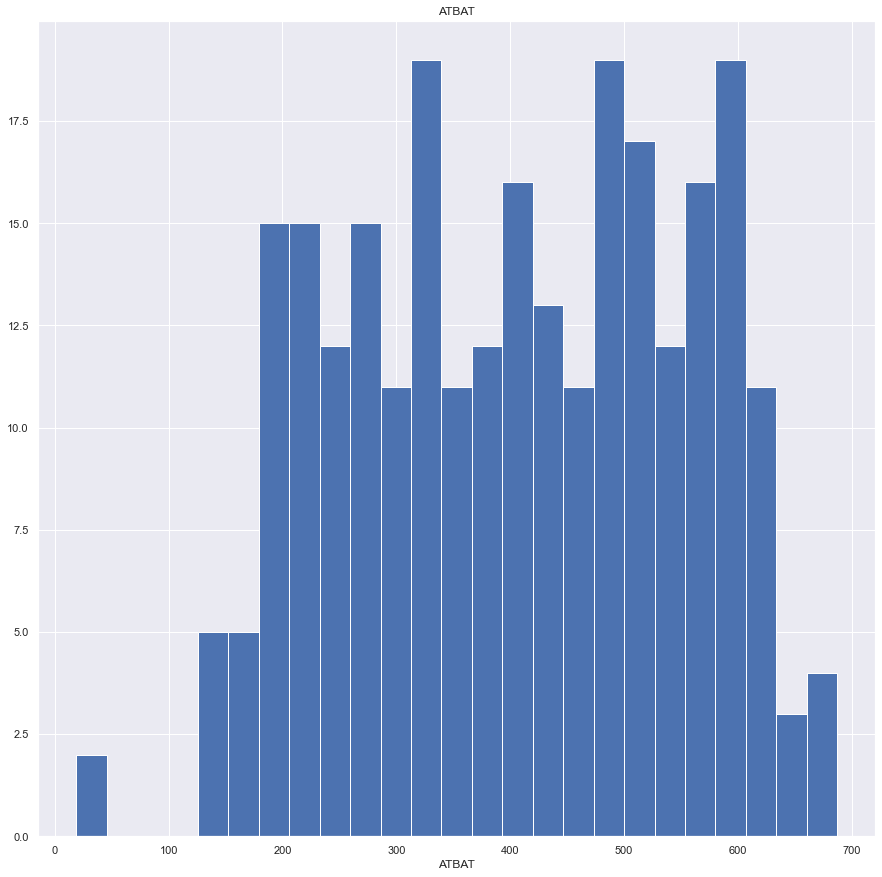

count   263.00
mean    107.83
std      45.13
min       1.00
5%       42.10
10%      52.00
20%      66.80
30%      77.00
40%      92.00
50%     103.00
60%     120.00
70%     136.00
80%     148.60
90%     168.00
95%     177.90
max     238.00
Name: HITS, dtype: float64


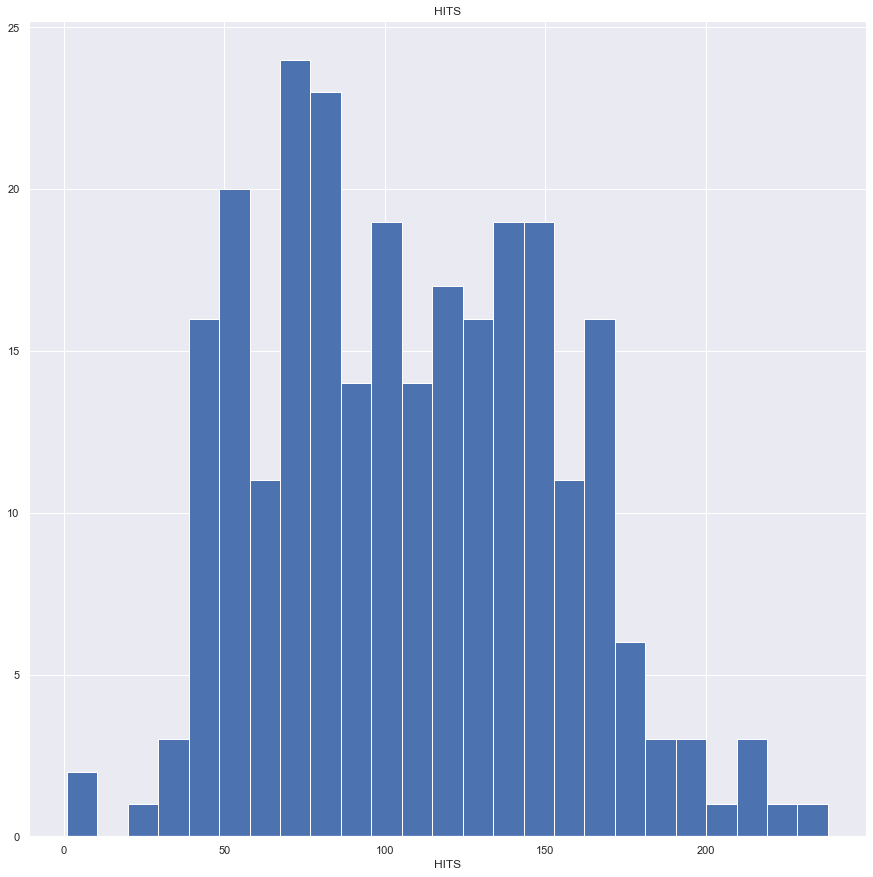

count   263.00
mean     11.60
std       8.69
min       0.00
5%        1.00
10%       2.00
20%       4.00
30%       5.00
40%       7.00
50%       9.00
60%      12.00
70%      16.00
80%      20.00
90%      25.00
95%      29.00
max      34.00
Name: HMRUN, dtype: float64


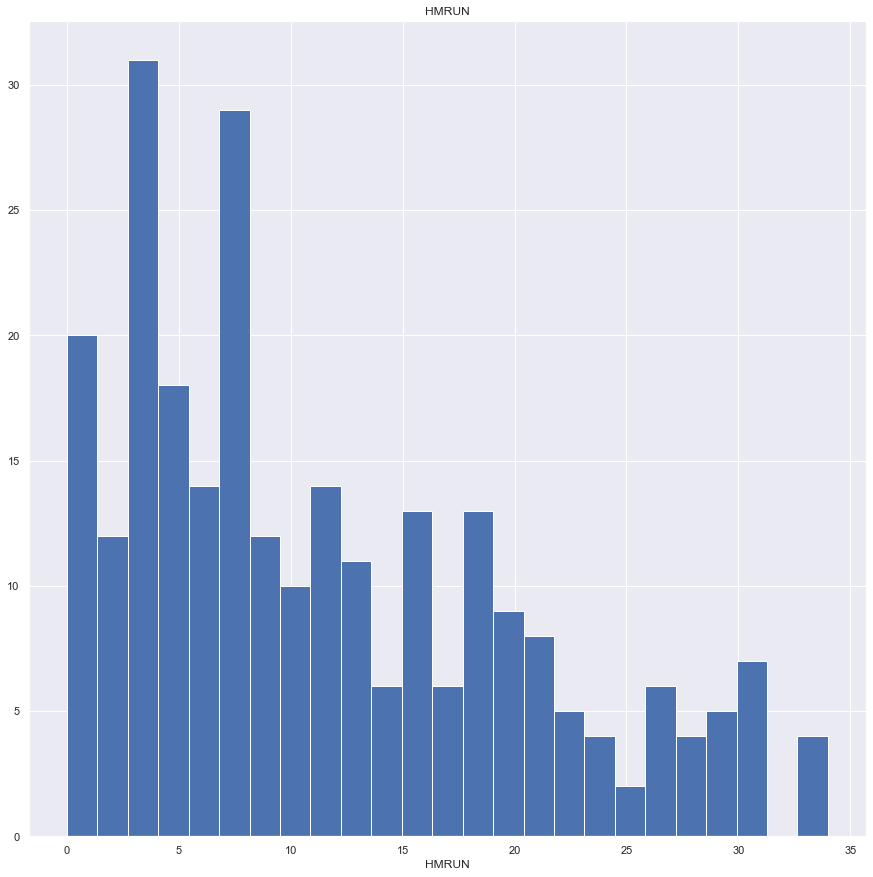

count   263.00
mean     54.73
std      25.51
min       0.00
5%       19.10
10%      24.00
20%      31.00
30%      37.00
40%      45.00
50%      52.00
60%      61.00
70%      68.40
80%      77.60
90%      90.00
95%      96.80
max     127.12
Name: RUNS, dtype: float64


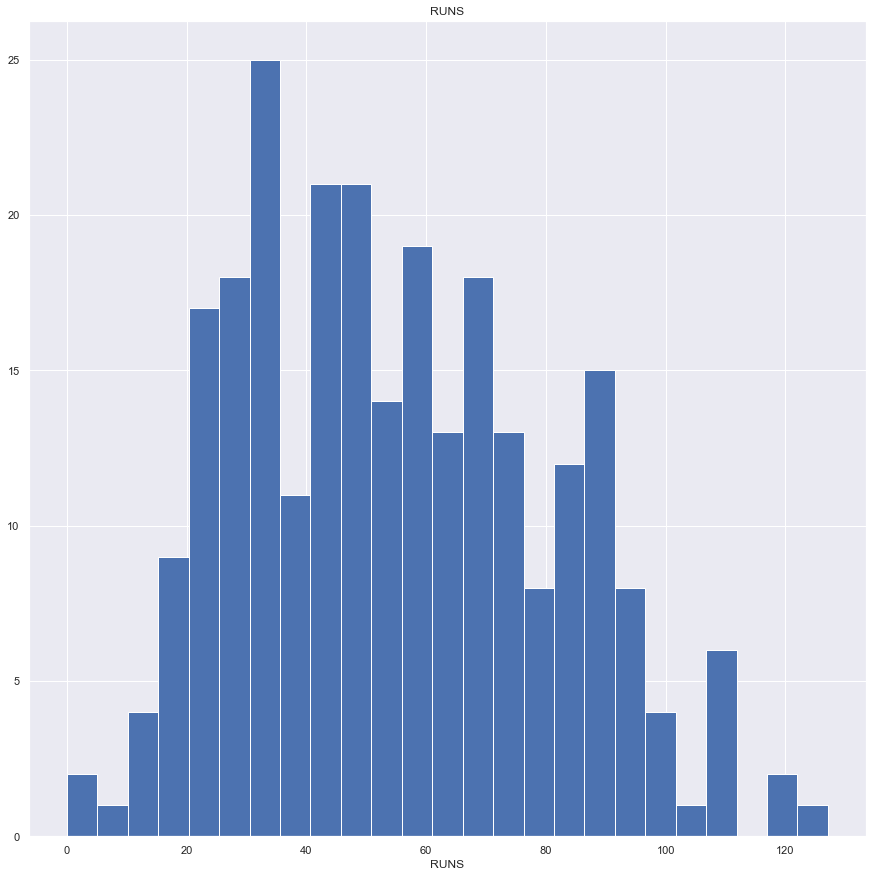

count   263.00
mean     51.48
std      25.87
min       0.00
5%       18.00
10%      23.00
20%      28.40
30%      33.60
40%      42.00
50%      47.00
60%      53.20
70%      61.40
80%      75.60
90%      88.00
95%      99.80
max     119.88
Name: RBI, dtype: float64


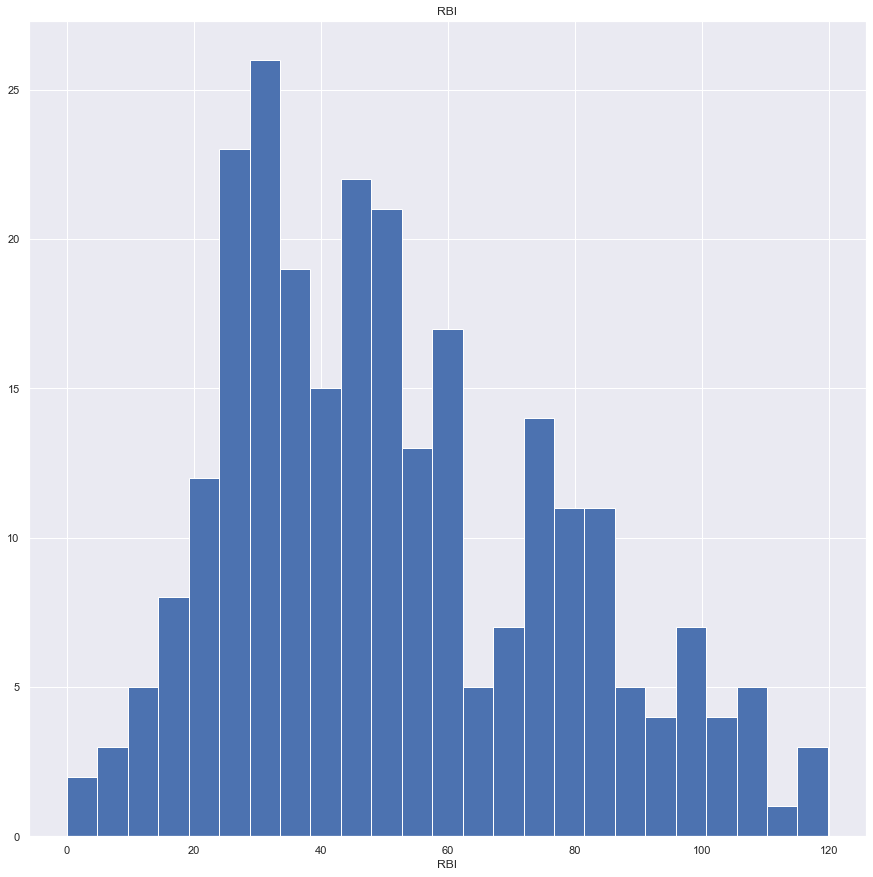

count   263.00
mean     41.09
std      21.66
min       0.00
5%       12.00
10%      16.00
20%      21.00
30%      26.60
40%      32.00
50%      37.00
60%      43.00
70%      53.00
80%      62.00
90%      71.80
95%      78.90
max      99.50
Name: WALKS, dtype: float64


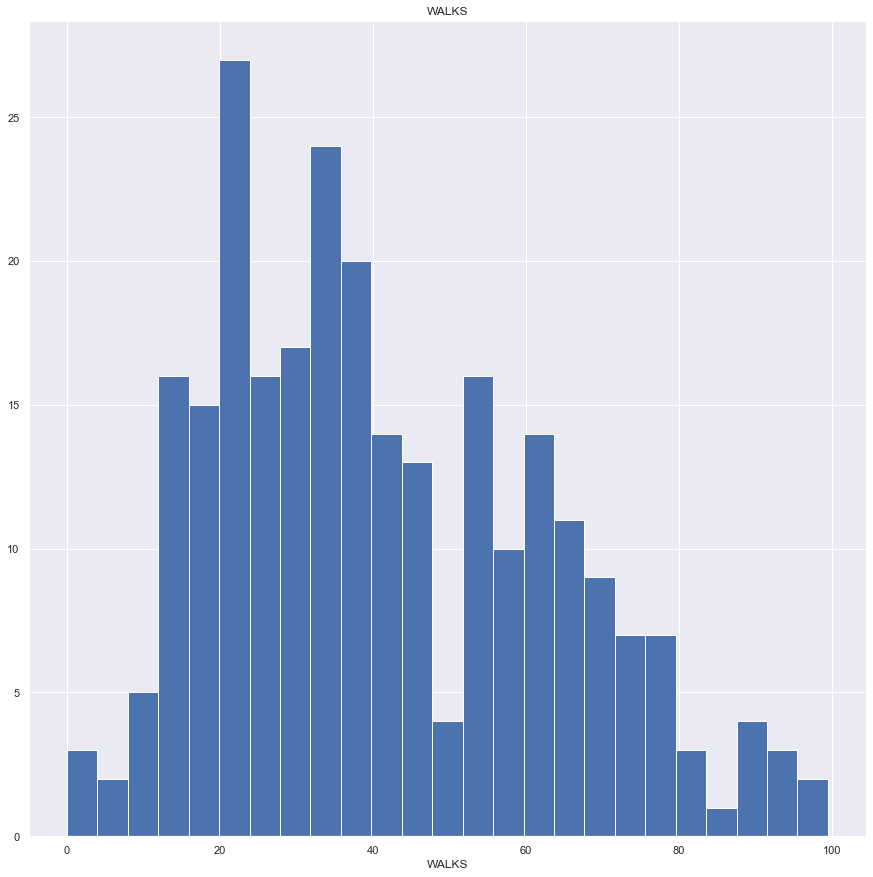

count   263.00
mean      7.30
std       4.76
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.00
70%       9.00
80%      12.00
90%      14.00
95%      16.90
max      21.50
Name: YEARS, dtype: float64


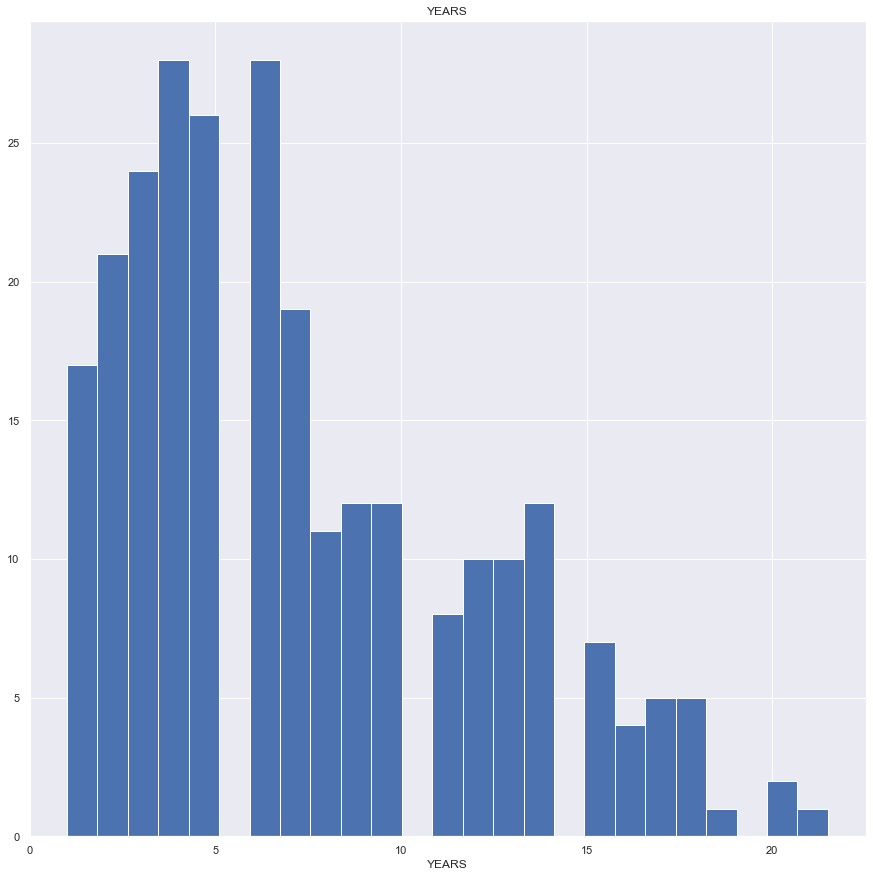

count    263.00
mean    2632.02
std     2192.33
min       19.00
5%       279.90
10%      413.60
20%      680.80
30%      993.40
40%     1488.20
50%     1931.00
60%     2696.60
70%     3269.40
80%     4406.80
90%     6098.00
95%     7120.10
max     8585.50
Name: CATBAT, dtype: float64


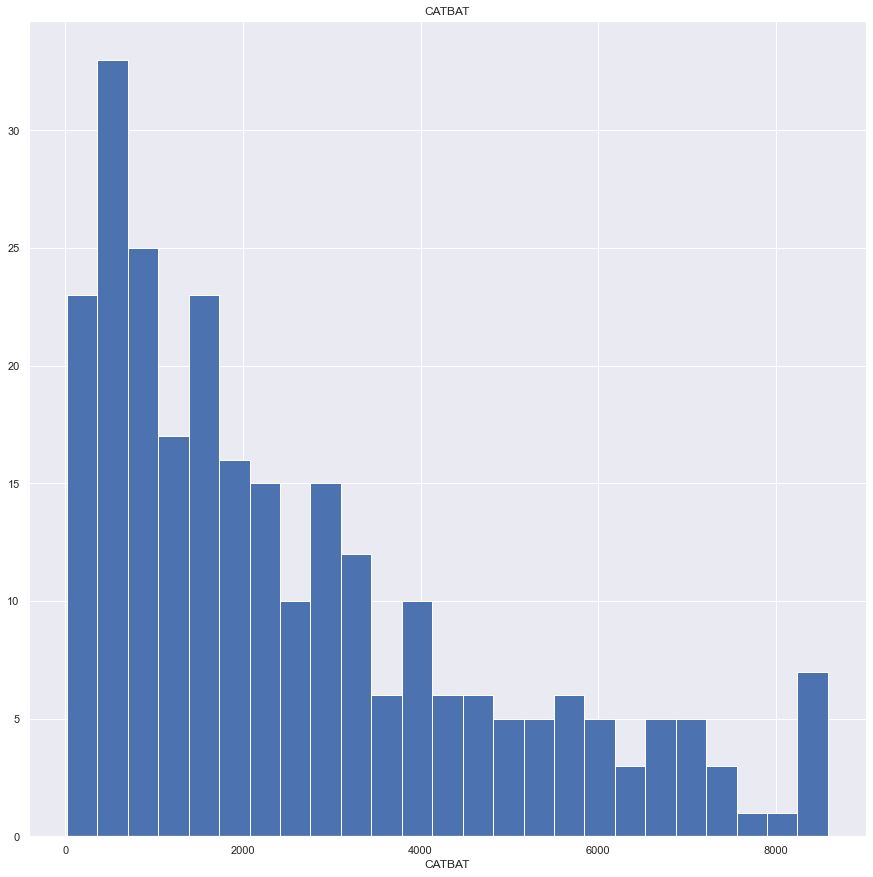

count    263.00
mean     712.52
std      611.77
min        4.00
5%        68.00
10%      102.20
20%      170.80
30%      257.80
40%      389.00
50%      516.00
60%      717.60
70%      892.00
80%     1209.00
90%     1658.00
95%     2023.50
max     2334.62
Name: CHITS, dtype: float64


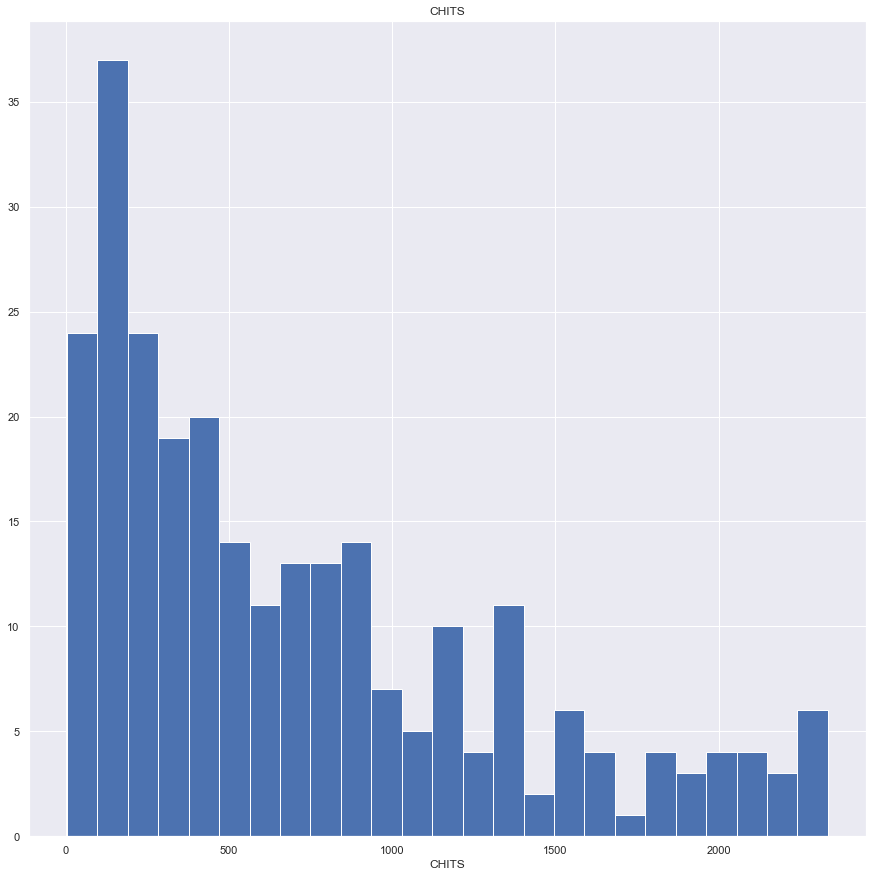

count   263.00
mean     62.27
std      61.61
min       0.00
5%        2.00
10%       5.00
20%      12.00
30%      18.20
40%      29.80
50%      40.00
60%      55.20
70%      77.40
80%     105.80
90%     174.80
95%     204.00
max     204.00
Name: CHMRUN, dtype: float64


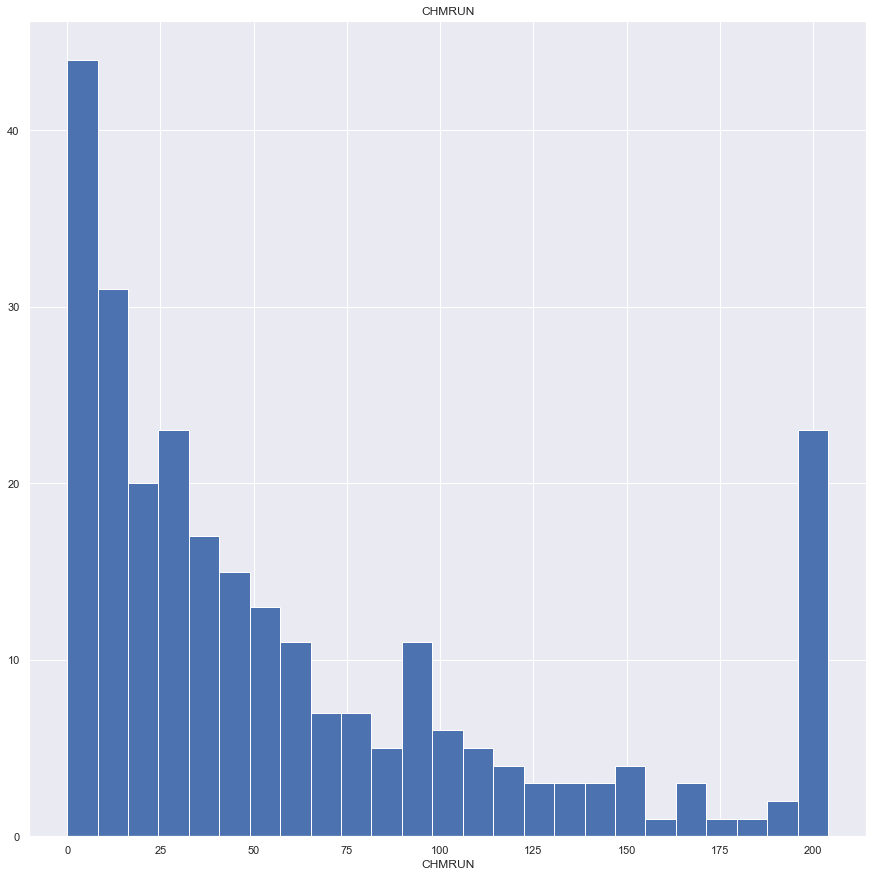

count    263.00
mean     356.05
std      311.53
min        2.00
5%        32.00
10%       51.80
20%       87.40
30%      128.60
40%      196.00
50%      250.00
60%      335.60
70%      436.80
80%      602.20
90%      879.60
95%     1040.60
max     1165.25
Name: CRUNS, dtype: float64


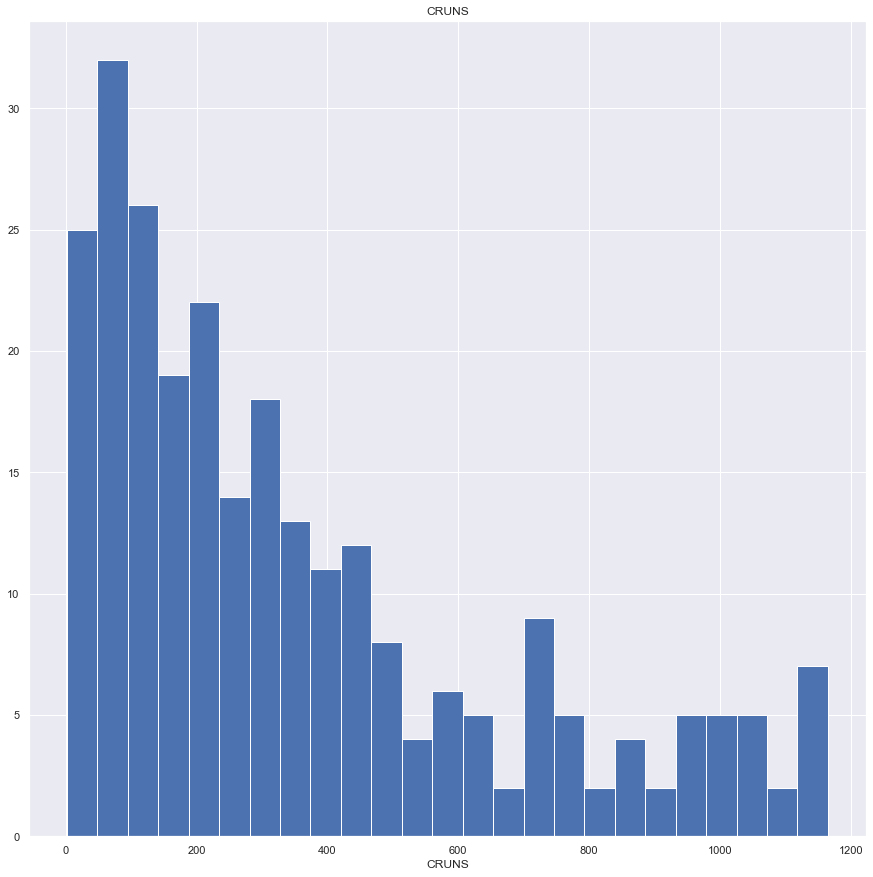

count   263.00
mean    312.76
std     277.23
min       3.00
5%       29.20
10%      38.20
20%      75.00
30%     110.00
40%     160.60
50%     230.00
60%     316.60
70%     380.80
80%     487.80
90%     835.80
95%     932.50
max     932.50
Name: CRBI, dtype: float64


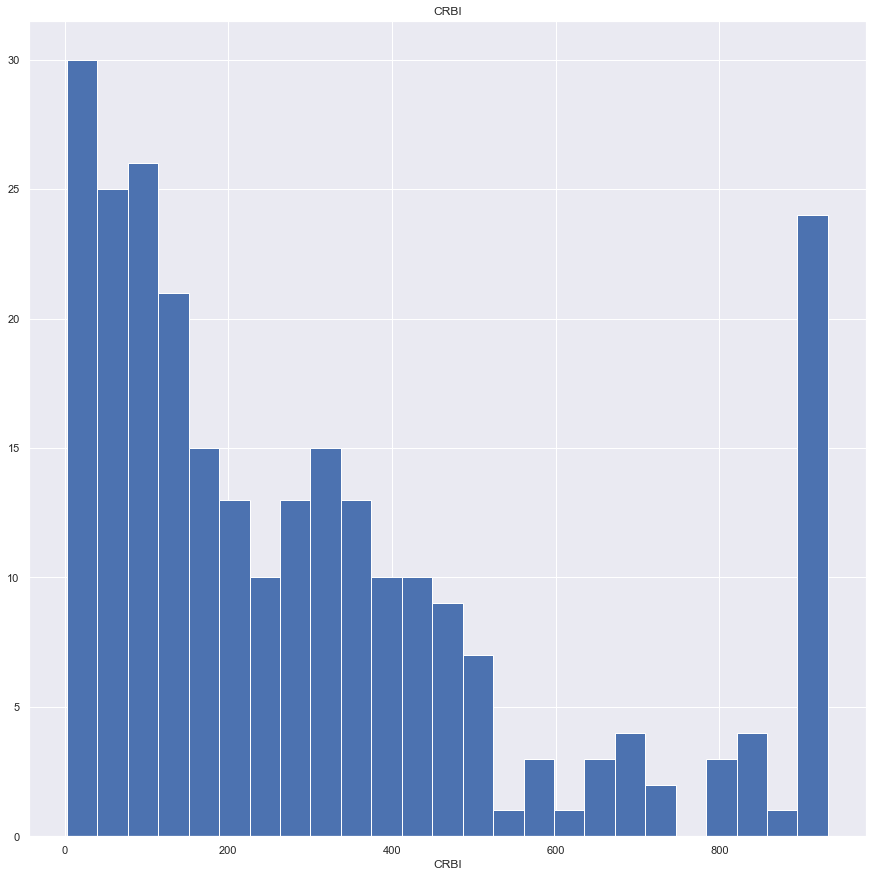

count   263.00
mean    245.36
std     219.49
min       1.00
5%       22.20
10%      33.20
20%      59.20
30%      87.00
40%     132.80
50%     174.00
60%     226.20
70%     296.80
80%     404.80
90%     641.40
95%     747.25
max     747.25
Name: CWALKS, dtype: float64


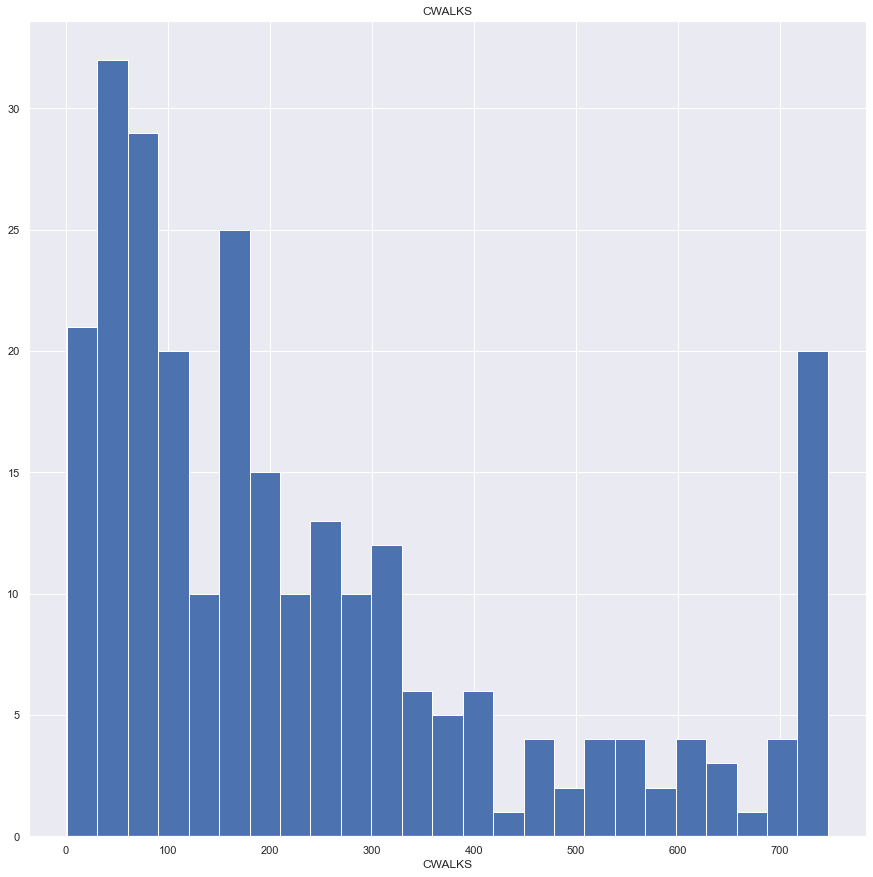

count   263.00
mean    254.73
std     182.46
min       0.00
5%       37.40
10%      62.60
20%     102.00
30%     136.20
40%     172.00
50%     224.00
60%     267.40
70%     303.00
80%     358.60
90%     648.62
95%     648.62
max     648.62
Name: PUTOUTS, dtype: float64


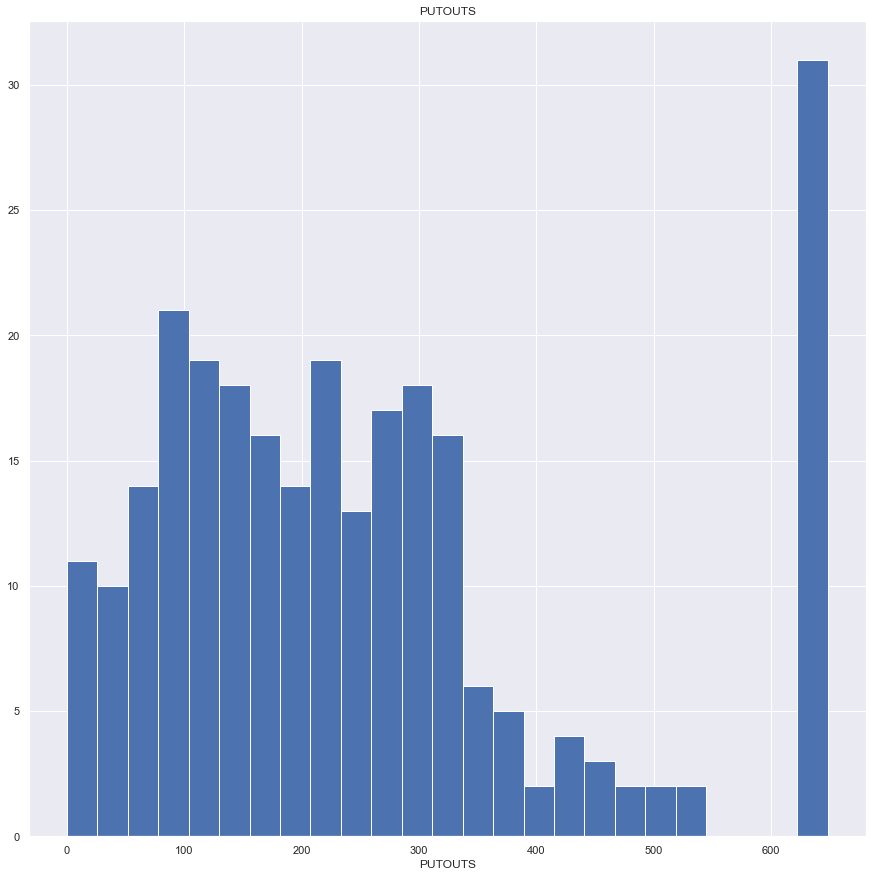

count   263.00
mean    115.11
std     136.88
min       0.00
5%        0.10
10%       3.00
20%       6.00
30%       9.00
40%      17.80
50%      45.00
60%      90.60
70%     151.40
80%     252.60
90%     373.60
95%     404.50
max     404.50
Name: ASSISTS, dtype: float64


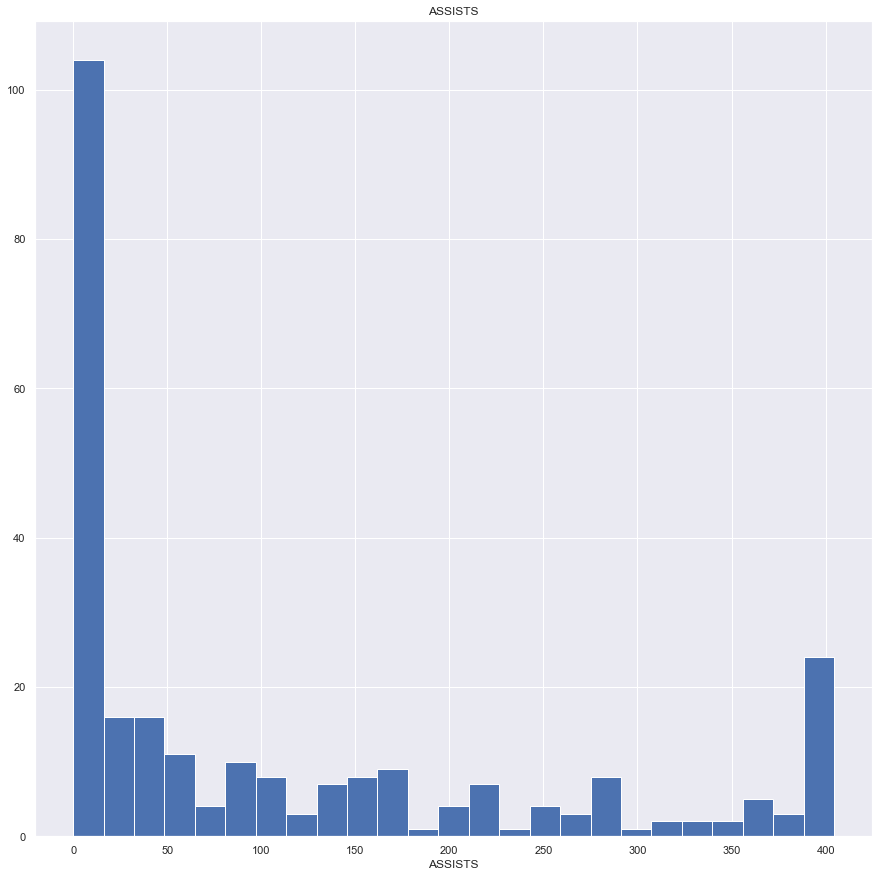

count   263.00
mean      8.48
std       6.31
min       0.00
5%        0.10
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       7.00
60%       9.00
70%      11.00
80%      15.00
90%      18.00
95%      21.90
max      23.00
Name: ERRORS, dtype: float64


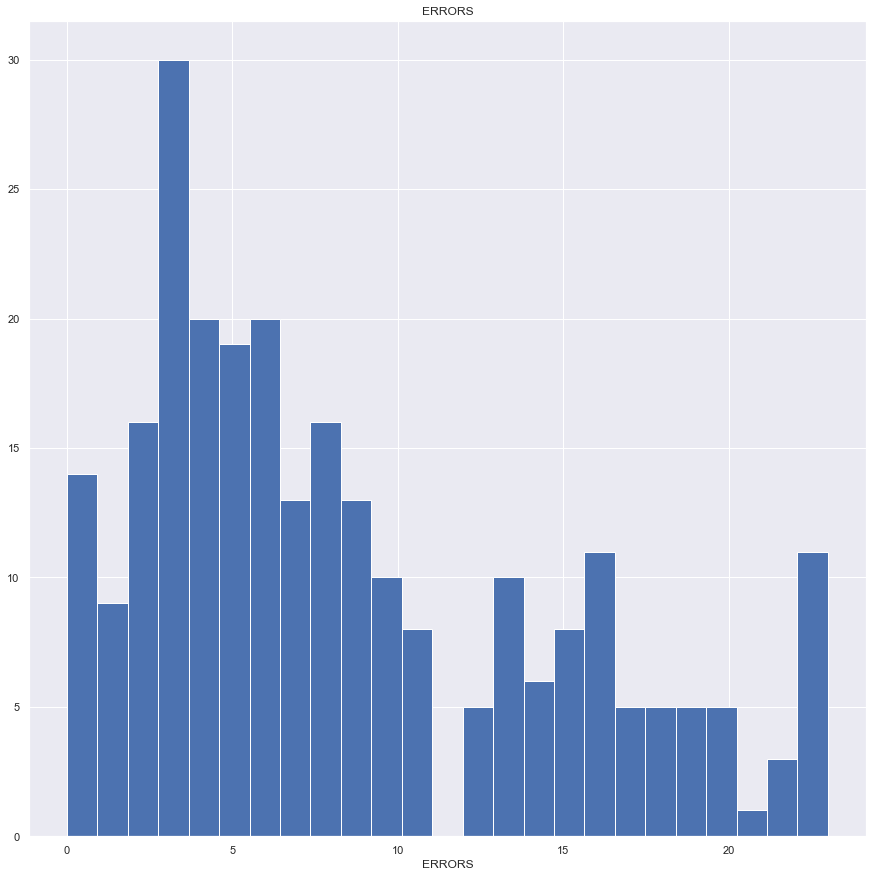

count    263.00
mean     520.03
std      400.91
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
max     1590.00
Name: SALARY, dtype: float64


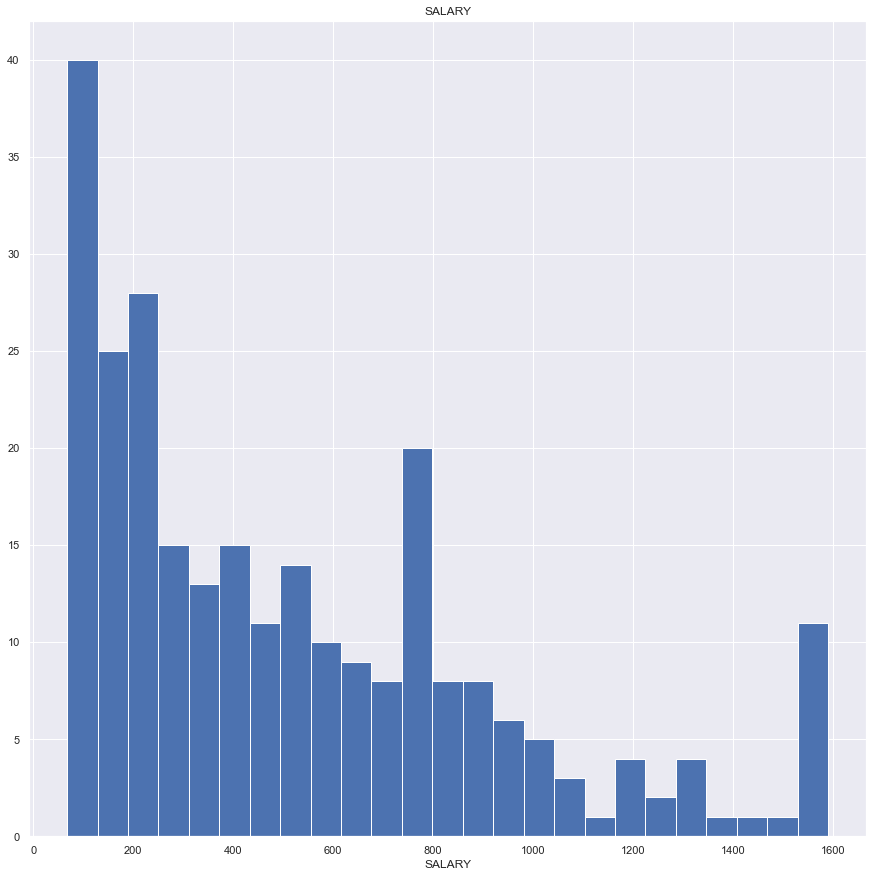

count   263.00
mean      0.32
std       0.29
min       0.01
5%        0.05
10%       0.06
20%       0.09
30%       0.13
40%       0.17
50%       0.20
60%       0.28
70%       0.36
80%       0.54
90%       0.86
95%       1.00
max       1.00
Name: HIT_RATIO, dtype: float64


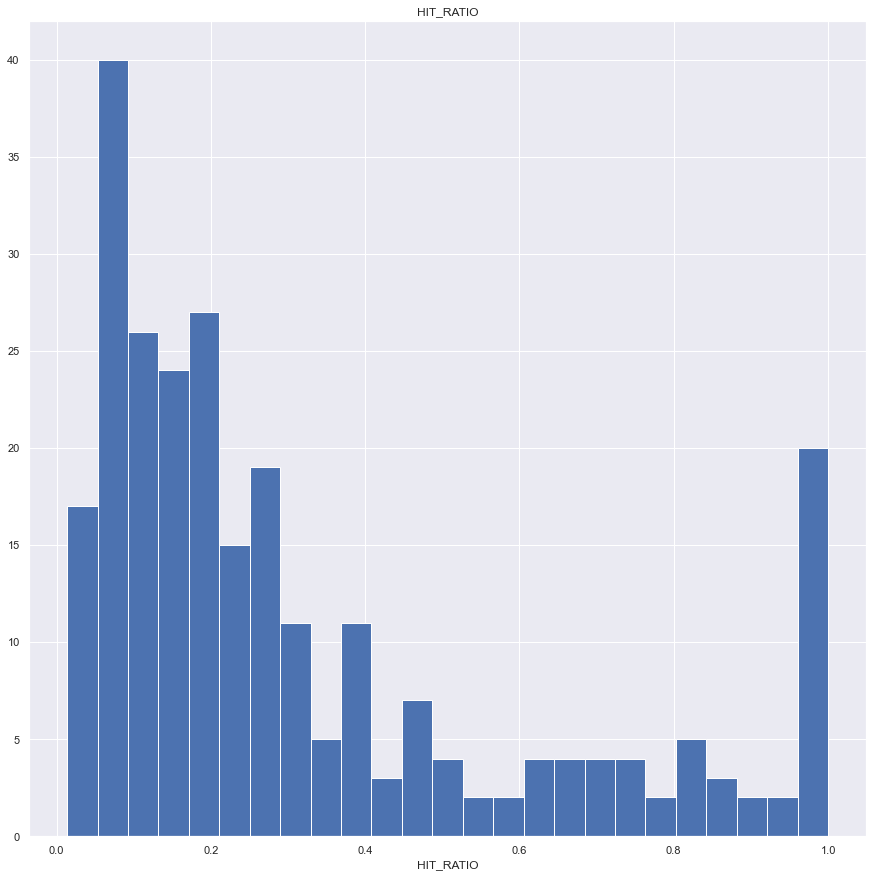

count   260.00
mean      0.35
std       0.31
min       0.00
5%        0.05
10%       0.07
20%       0.11
30%       0.14
40%       0.18
50%       0.24
60%       0.29
70%       0.38
80%       0.59
90%       1.00
95%       1.00
max       1.00
Name: HMRUN_RATIO, dtype: float64


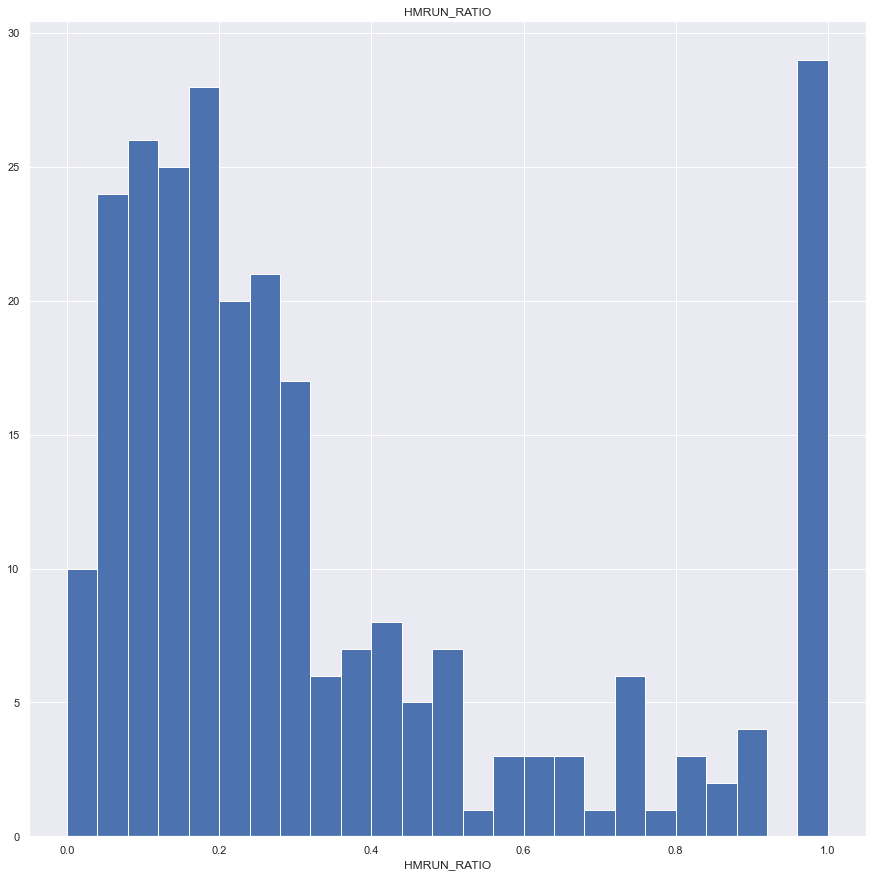

count   263.00
mean      0.32
std       0.29
min       0.02
5%        0.05
10%       0.07
20%       0.09
30%       0.13
40%       0.18
50%       0.21
60%       0.27
70%       0.35
80%       0.53
90%       0.86
95%       1.00
max       1.00
Name: ATBAT_RATIO, dtype: float64


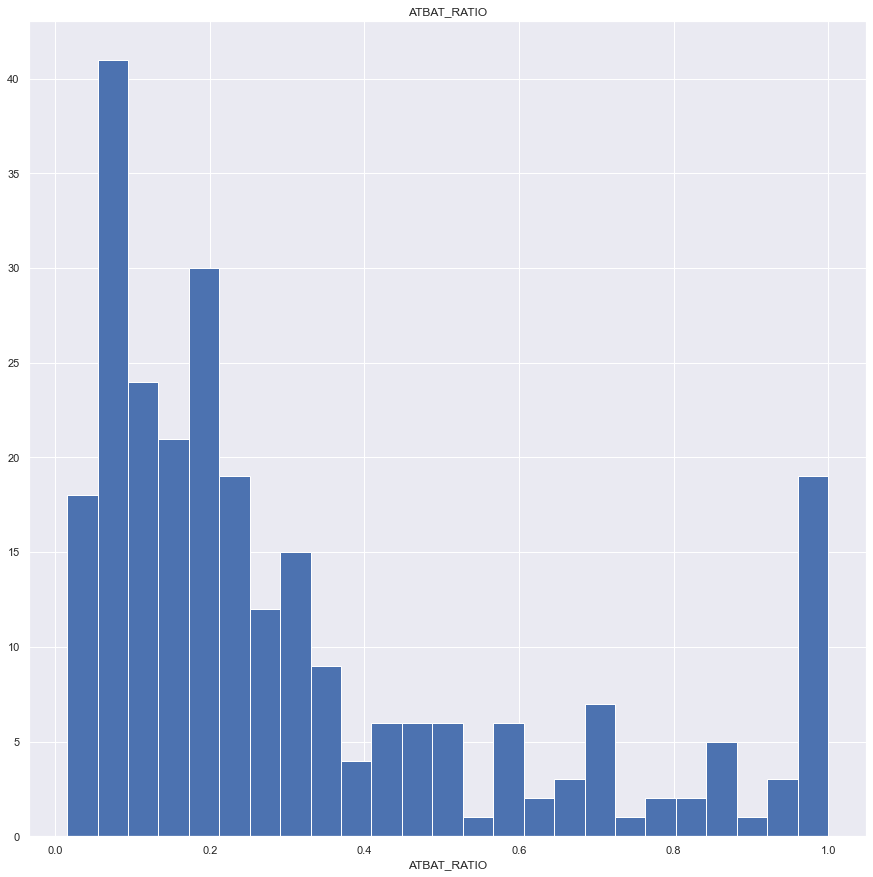

count   263.00
mean      0.32
std       0.28
min       0.00
5%        0.05
10%       0.06
20%       0.09
30%       0.13
40%       0.17
50%       0.22
60%       0.27
70%       0.38
80%       0.53
90%       0.81
95%       1.00
max       1.00
Name: RUNS_RATIO, dtype: float64


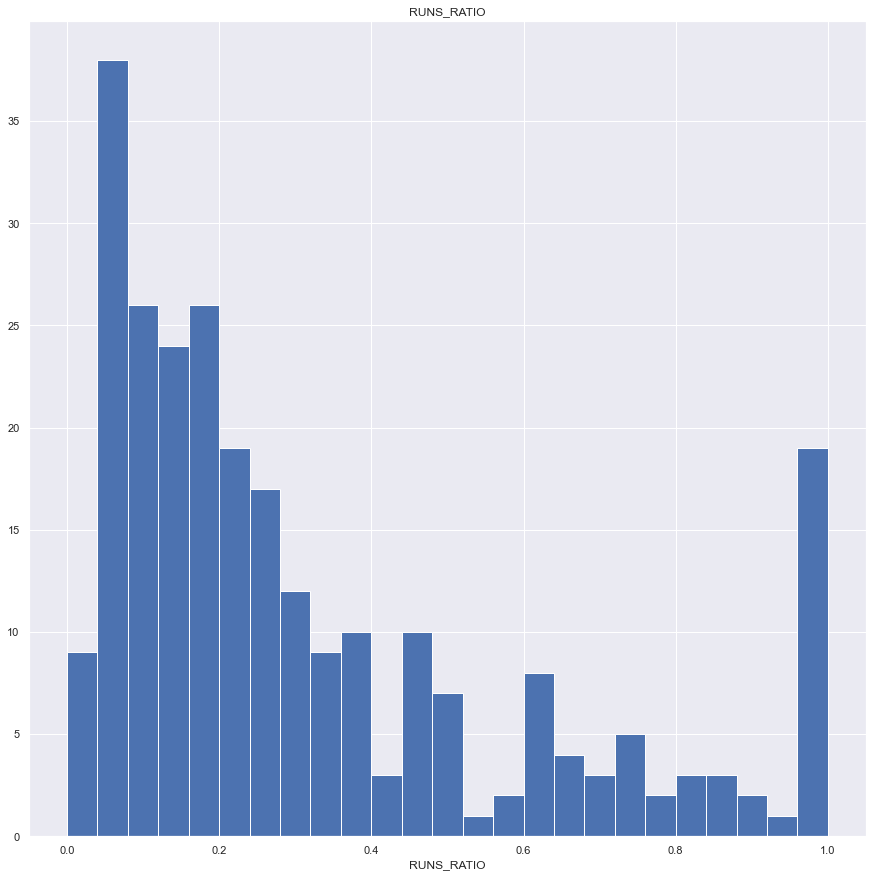

count   263.00
mean      0.33
std       0.29
min       0.00
5%        0.05
10%       0.07
20%       0.11
30%       0.13
40%       0.18
50%       0.22
60%       0.28
70%       0.38
80%       0.54
90%       0.87
95%       1.00
max       1.00
Name: WALKS_RATIO, dtype: float64


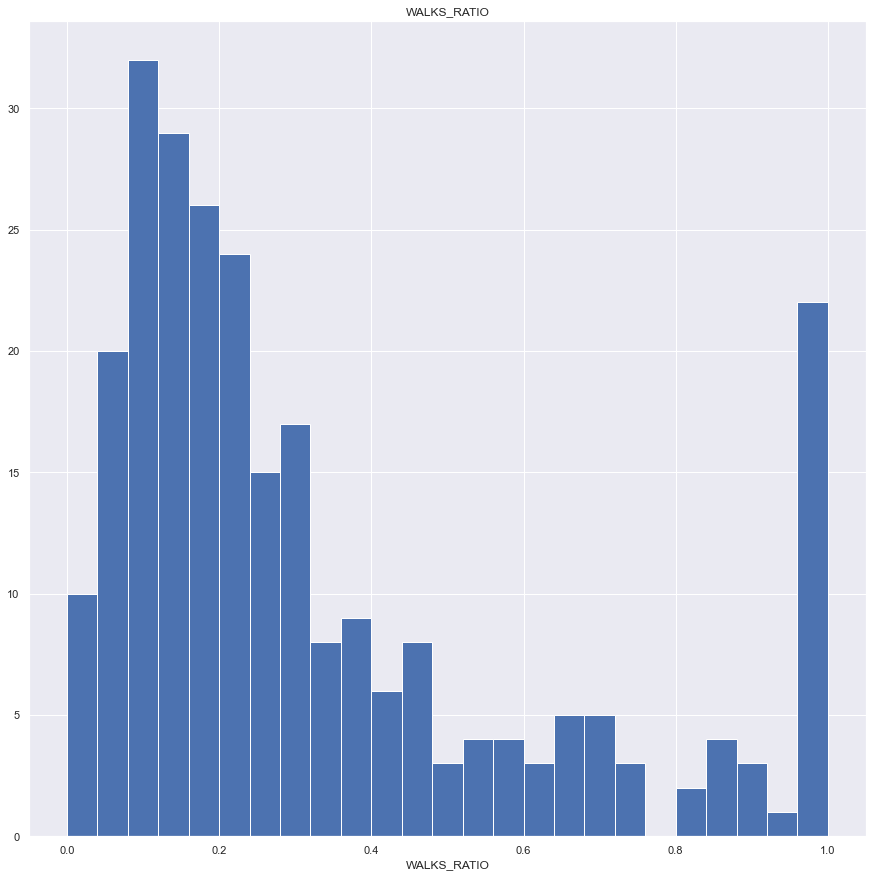

count   263.00
mean      0.34
std       0.30
min       0.00
5%        0.06
10%       0.07
20%       0.10
30%       0.14
40%       0.17
50%       0.22
60%       0.27
70%       0.40
80%       0.60
90%       0.90
95%       1.00
max       1.00
Name: RBI_RATIO, dtype: float64


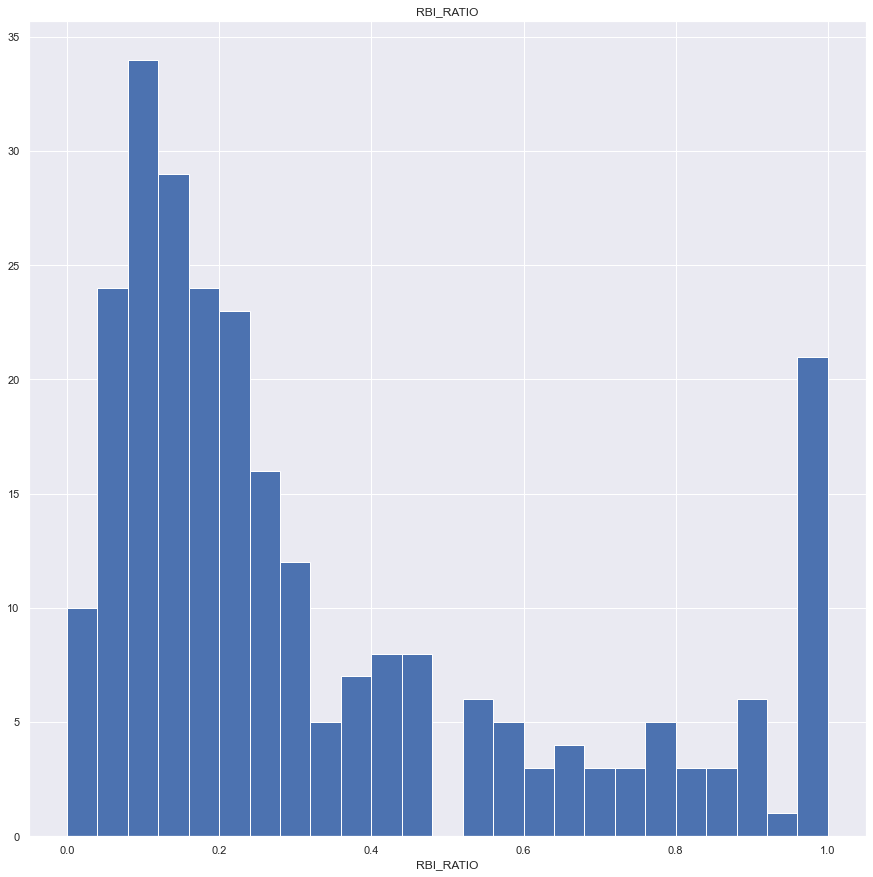

count   263.00
mean     93.09
std      92.65
min       6.68
5%       16.75
10%      22.37
20%      32.84
30%      40.95
40%      51.40
50%      65.11
60%      78.68
70%     100.20
80%     130.15
90%     201.33
95%     285.30
max     593.00
Name: ATBAT_PER_YEAR, dtype: float64


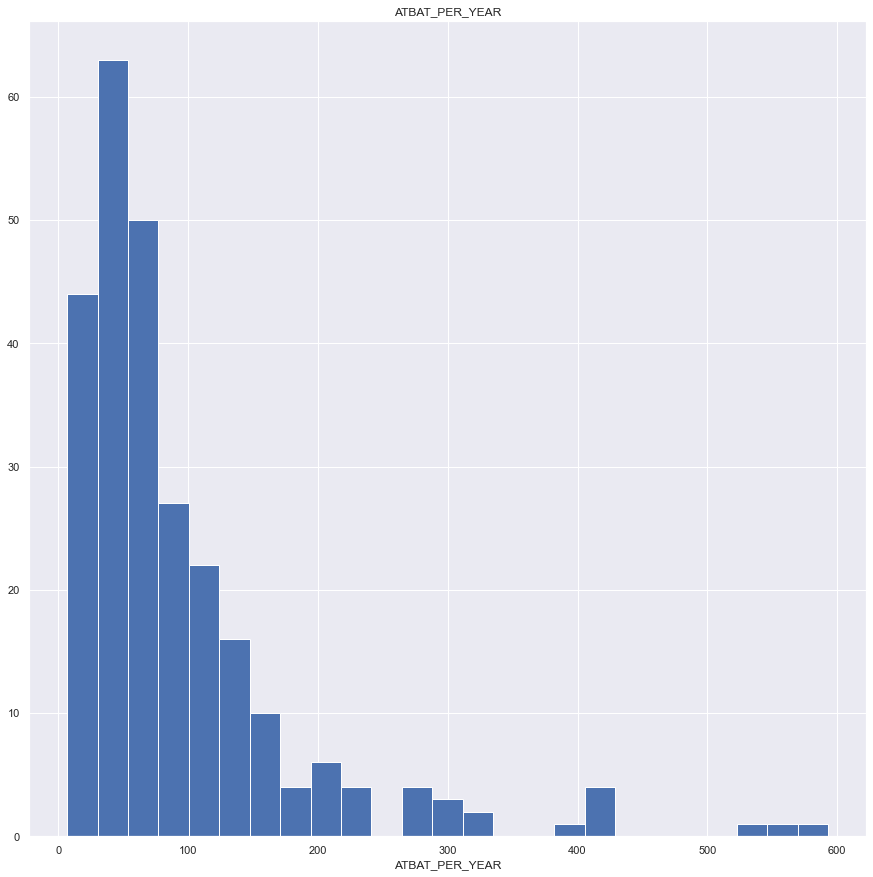

count   263.00
mean     24.56
std      24.59
min       0.50
5%        4.21
10%       5.80
20%       8.52
30%      11.12
40%      13.41
50%      16.40
60%      20.42
70%      26.50
80%      35.92
90%      51.40
95%      71.75
max     172.00
Name: HITS_PER_YEAR, dtype: float64


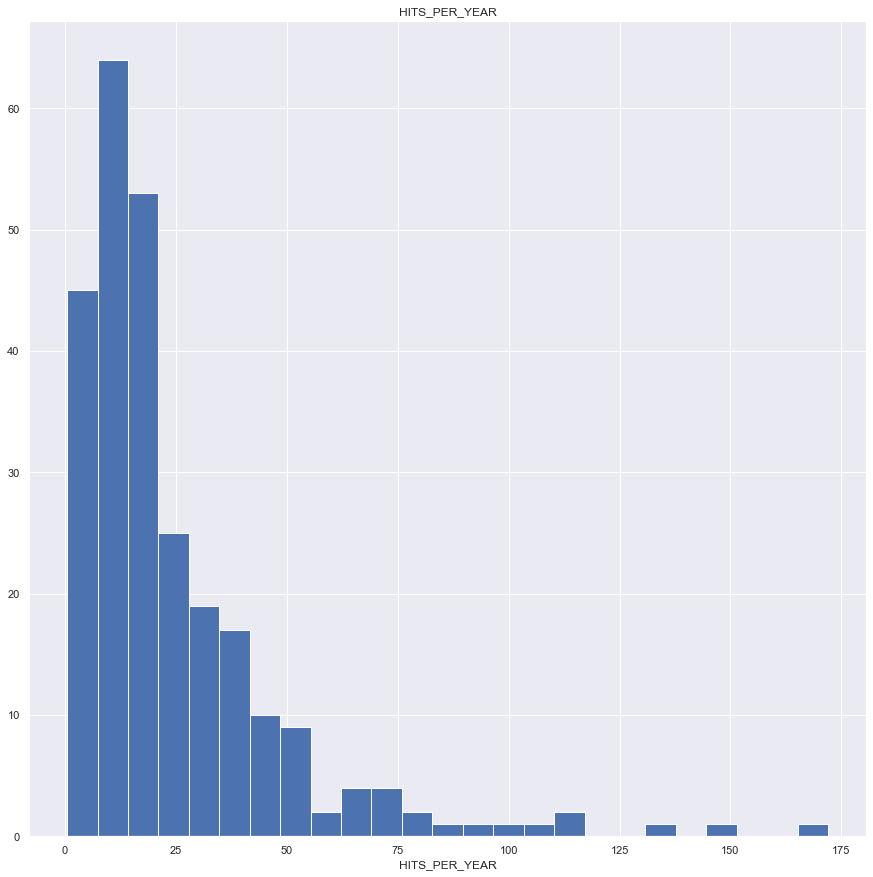

count   263.00
mean      2.58
std       3.65
min       0.00
5%        0.21
10%       0.33
20%       0.55
30%       0.82
40%       1.00
50%       1.40
60%       2.00
70%       2.58
80%       3.42
90%       6.00
95%       9.00
max      30.00
Name: HMRUN_PER_YEAR, dtype: float64


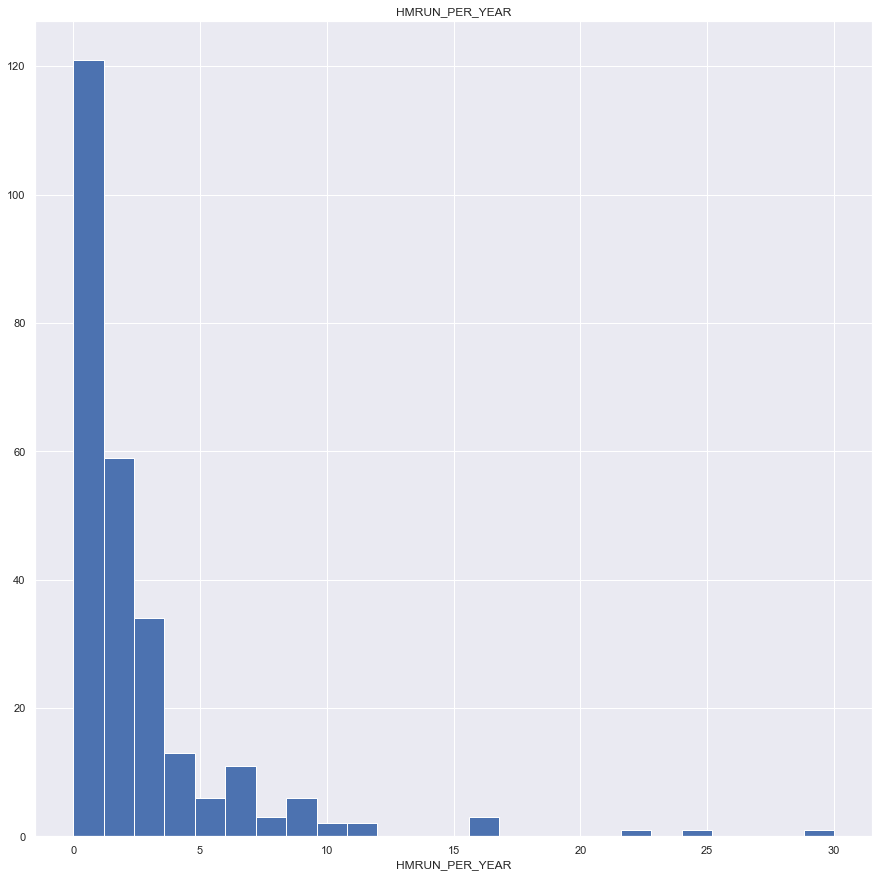

count   263.00
mean     12.60
std      13.34
min       0.00
5%        2.00
10%       2.68
20%       4.17
30%       5.29
40%       6.58
50%       8.09
60%      10.17
70%      13.00
80%      18.37
90%      26.90
95%      34.90
max      82.00
Name: RUNS_PER_YEAR, dtype: float64


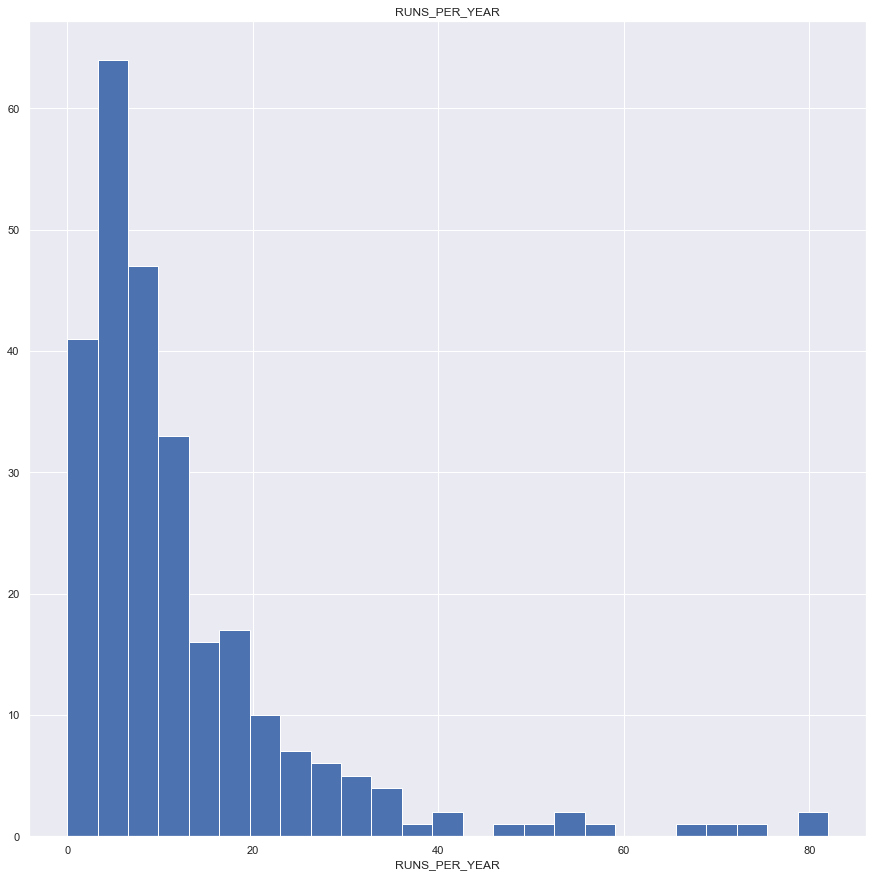

count   263.00
mean     11.43
std      12.48
min       0.00
5%        1.93
10%       2.60
20%       3.71
30%       4.75
40%       6.40
50%       7.62
60%       9.21
70%      12.10
80%      16.00
90%      23.45
95%      33.50
max     100.00
Name: RBI_PER_YEAR, dtype: float64


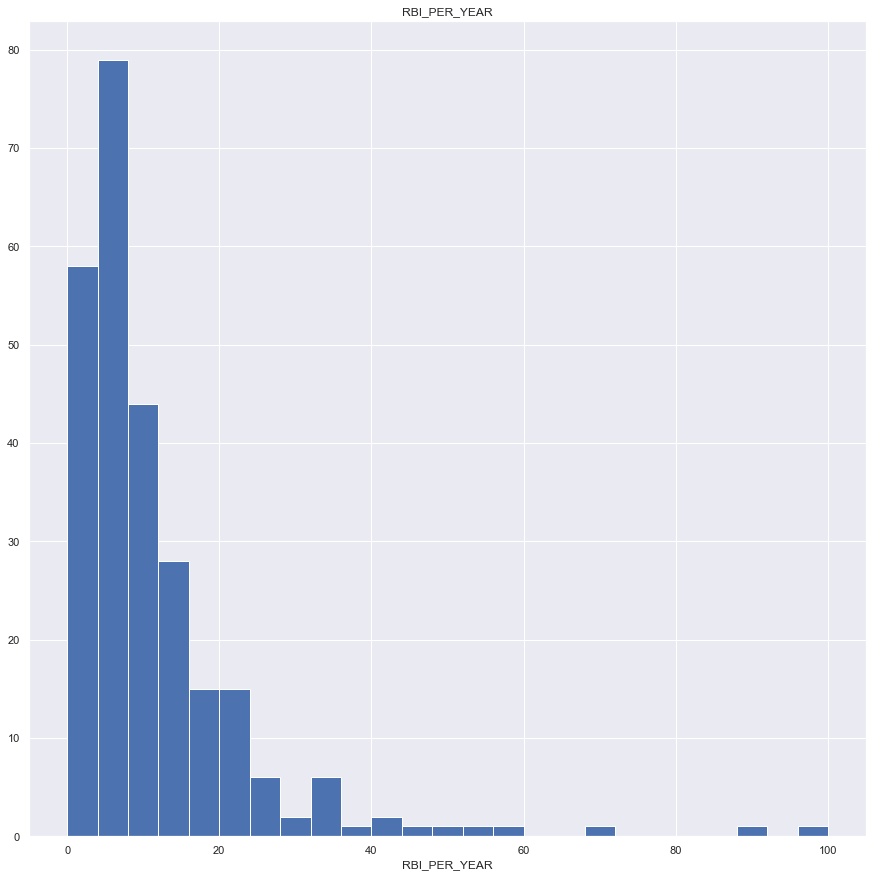

count   263.00
mean      9.13
std       9.86
min       0.00
5%        1.42
10%       2.00
20%       2.86
30%       3.79
40%       4.97
50%       6.29
60%       7.58
70%       9.50
80%      11.93
90%      19.77
95%      29.90
max      65.00
Name: WALKS_PER_YEAR, dtype: float64


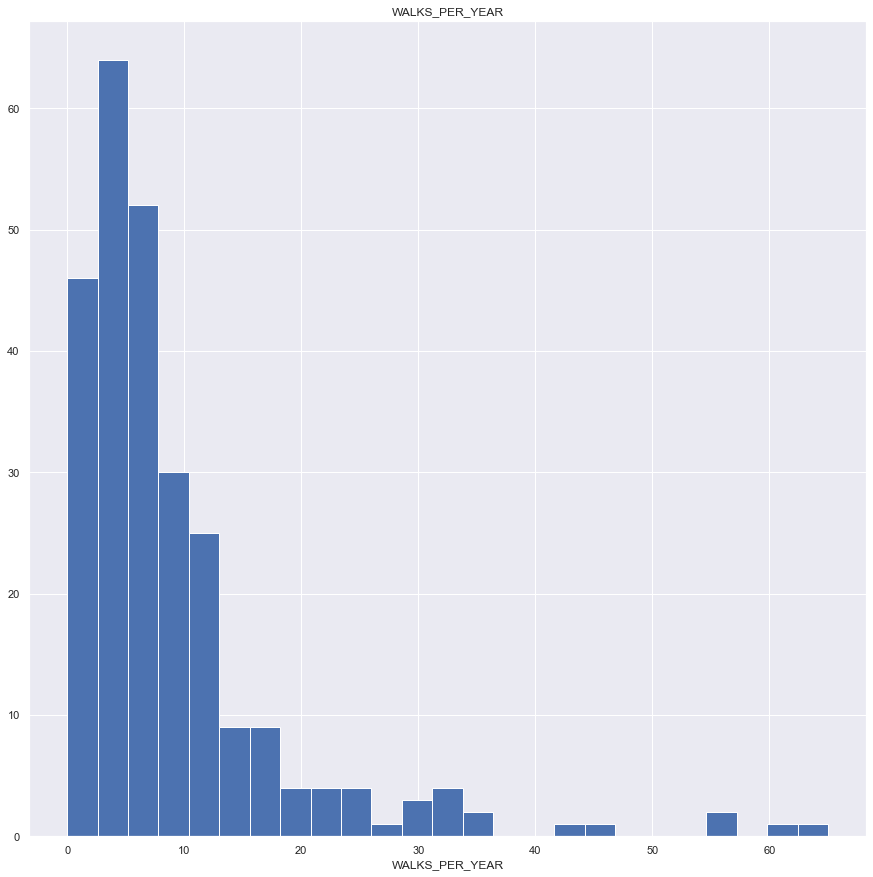

In [48]:
for col in num_col:
    num_col_analysis(df,col,plot = True)

# Categorical Analysis - 2

In [49]:
for col in cat_col:
    target_summary_with_cat(df,"SALARY",col)

        TARGET_MEAN  TARGET_COUNT
LEAGUE                           
A            524.45           139
N            515.06           124


          TARGET_MEAN  TARGET_COUNT
DIVISION                           
E              594.26           129
W              448.56           134


           TARGET_MEAN  TARGET_COUNT
NEWLEAGUE                           
A               519.82           141
N               520.27           122


          TARGET_MEAN  TARGET_COUNT
TRANSFER                           
A_N            558.12             8
N_A            486.00            10
Stand_A        522.40           131
Stand_N        517.61           114


               TARGET_MEAN  TARGET_COUNT
EXPERIENCE                              
Expert_Player       710.93            77
Junior_Player       149.65            17
Mid_Player          236.21            73
Senior_Player       648.31            96


             TARGET_MEAN  TARGET_COUNT
EXP_DIV_CAT                           
Expert_East       745.

   LEAGUE  Ratio
A     139  52.85
N     124  47.15


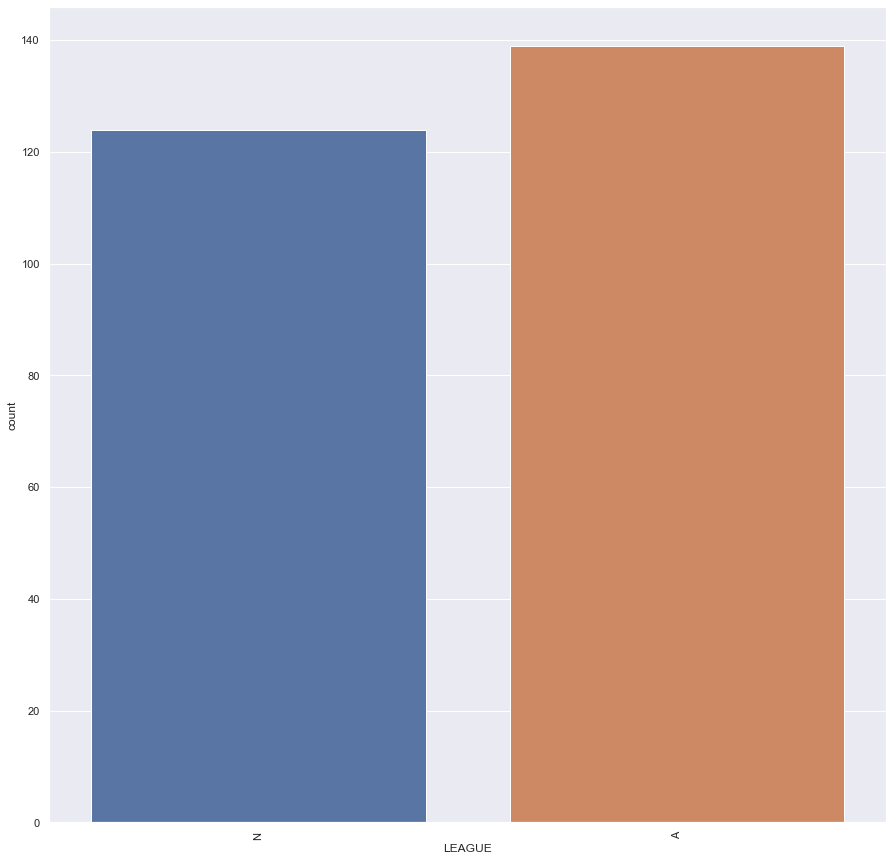

   DIVISION  Ratio
W       134  50.95
E       129  49.05


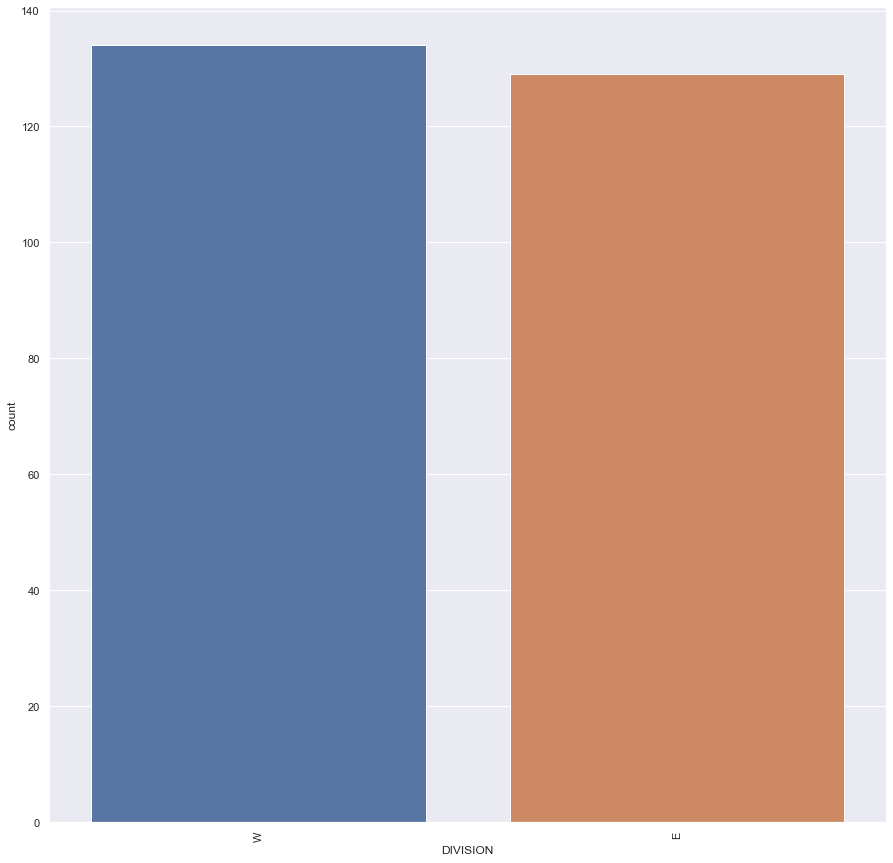

   NEWLEAGUE  Ratio
A        141  53.61
N        122  46.39


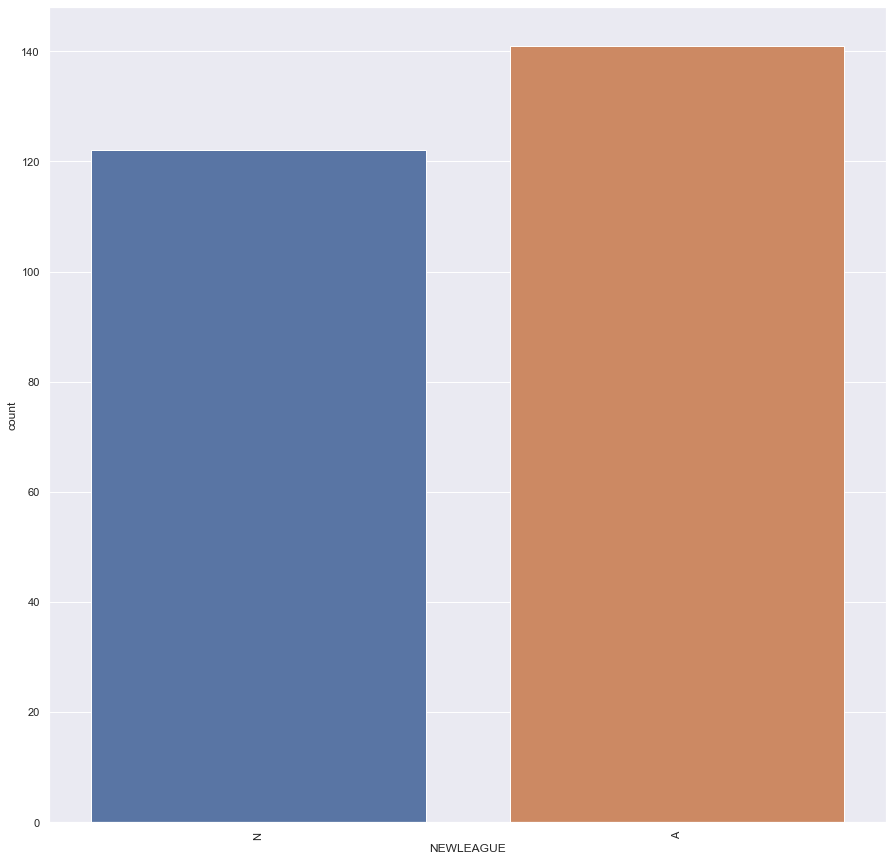

         TRANSFER  Ratio
Stand_A       131  49.81
Stand_N       114  43.35
N_A            10   3.80
A_N             8   3.04


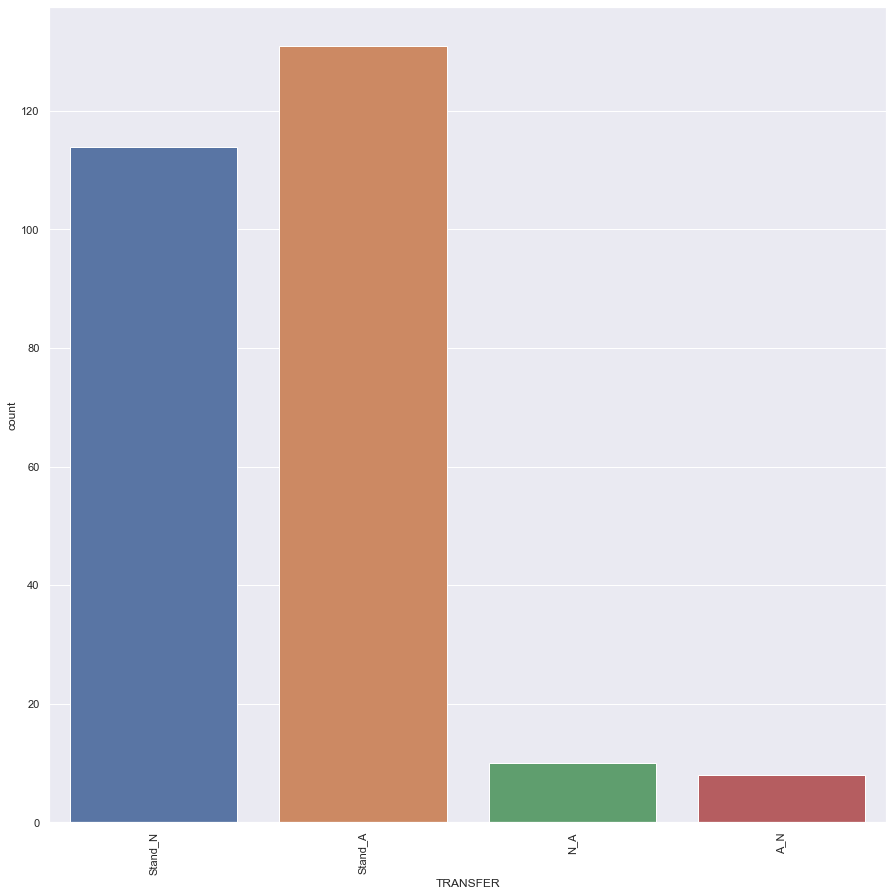

               EXPERIENCE  Ratio
Senior_Player          96  36.50
Expert_Player          77  29.28
Mid_Player             73  27.76
Junior_Player          17   6.46


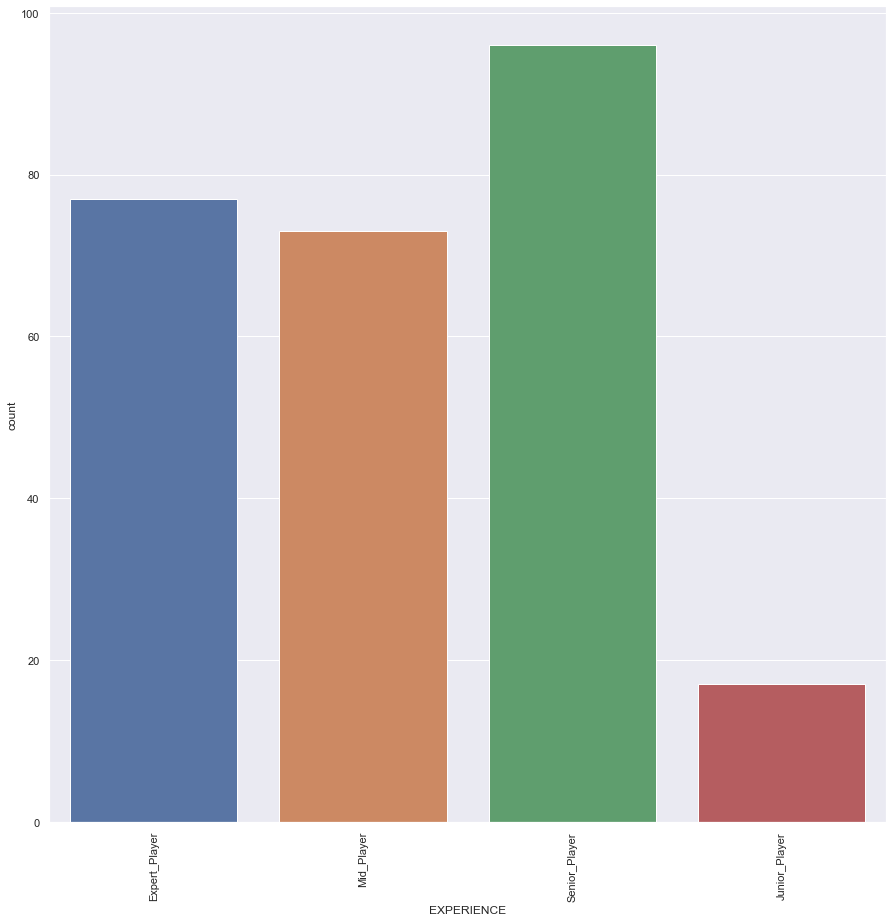

             EXP_DIV_CAT  Ratio
Senior_East           52  19.77
Senior_West           44  16.73
Expert_West           39  14.83
Mid_West              39  14.83
Expert_East           38  14.45
Mid_East              34  12.93
Junior_West           12   4.56
Junior_East            5   1.90


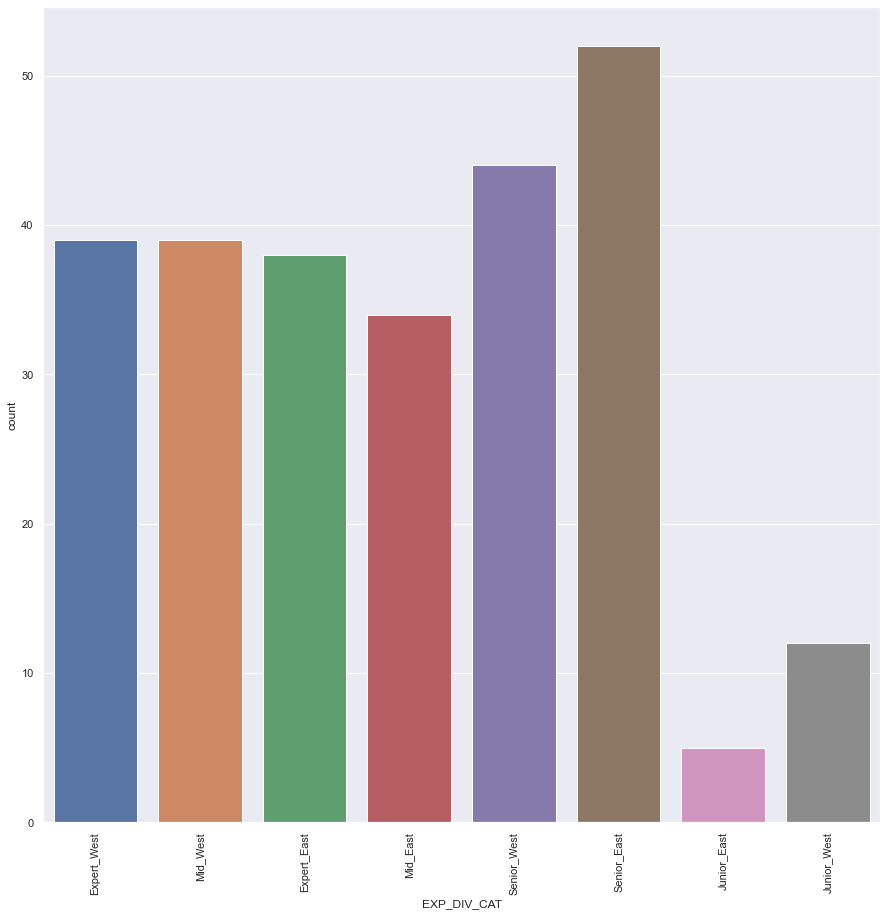

In [50]:
for col in cat_col:
    cat_col_analysis(df,col,plot = True)

# Check Outlier Values - 2

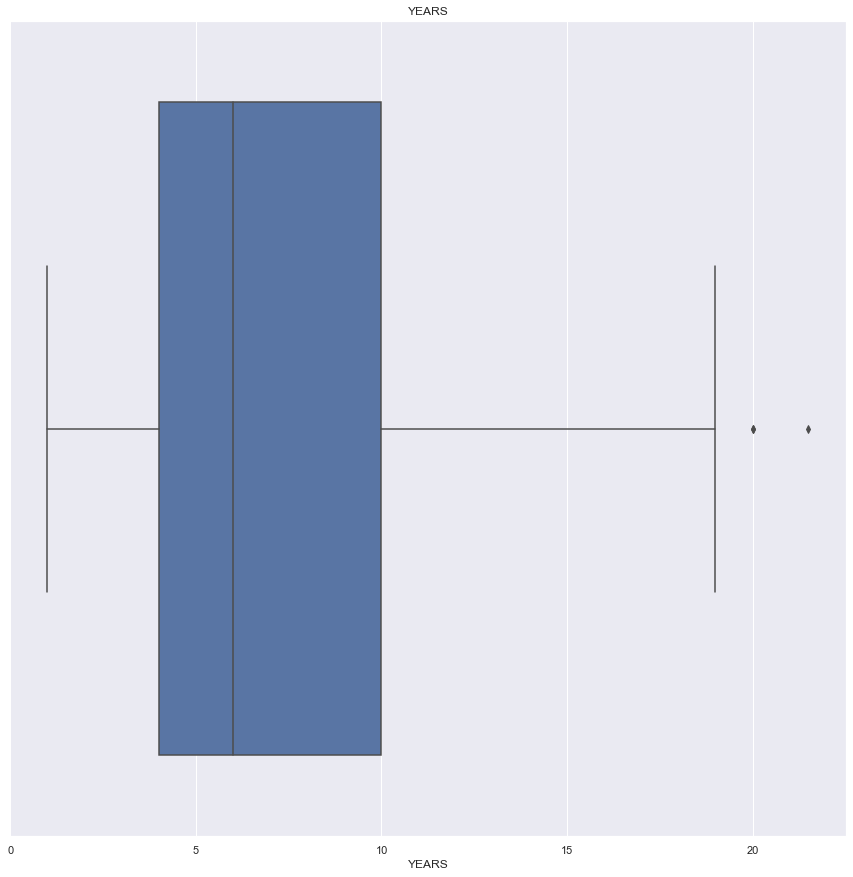

Low: -5.0 Up: 19.0
#######################################


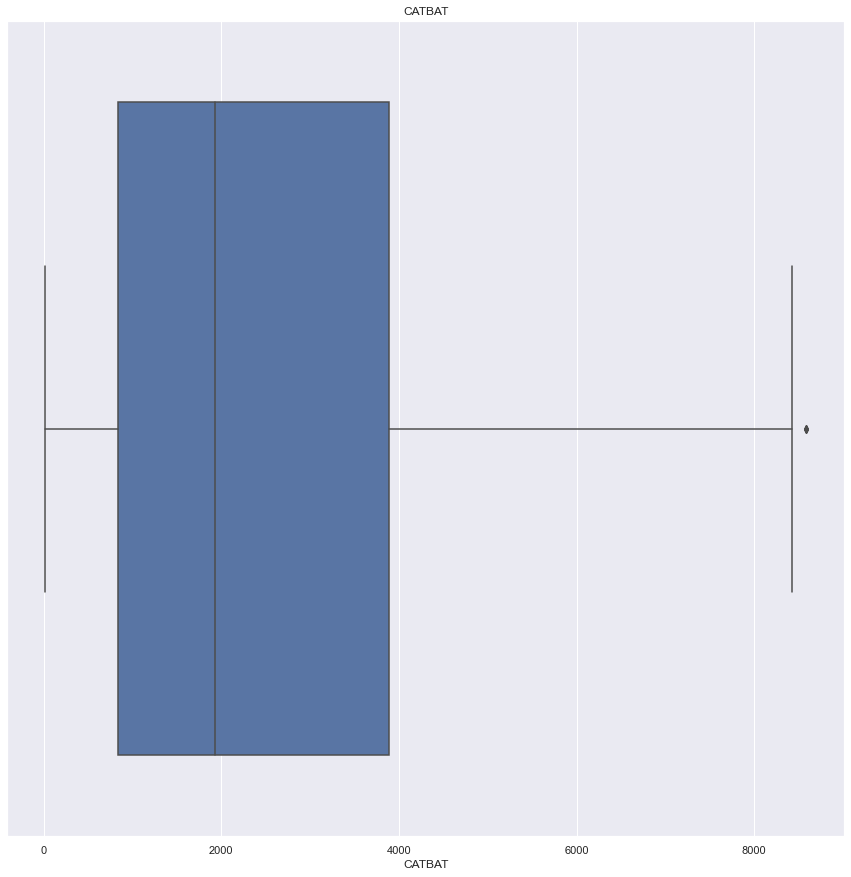

Low: -3729.5 Up: 8462.5
#######################################


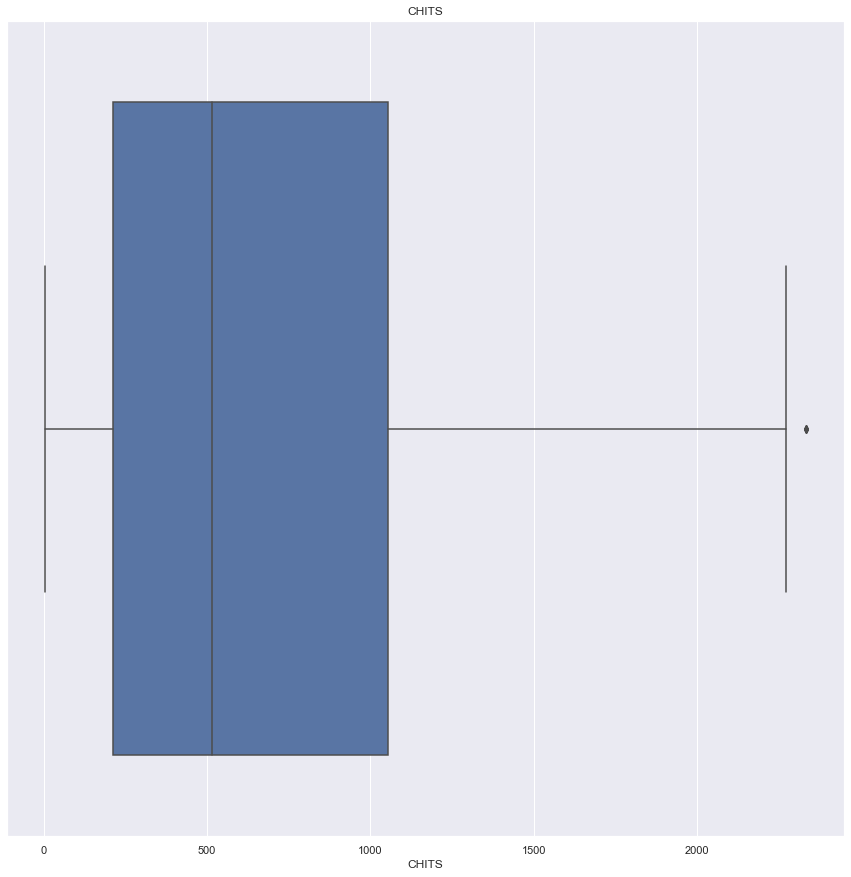

Low: -1051.0 Up: 2317.0
#######################################


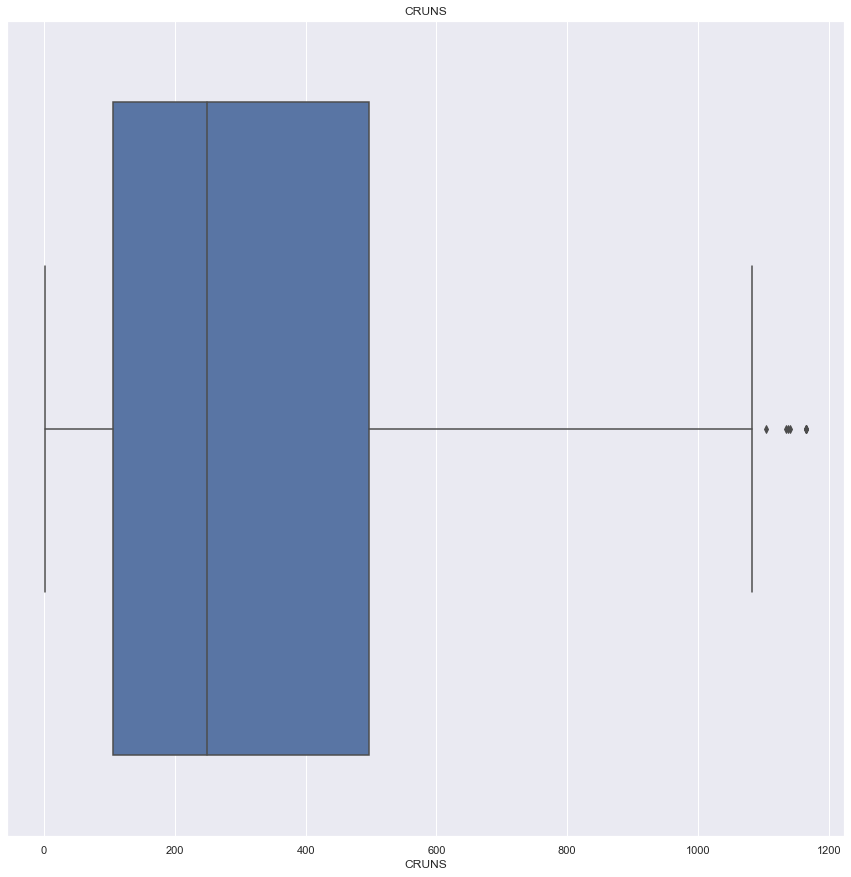

Low: -482.5 Up: 1085.5
#######################################


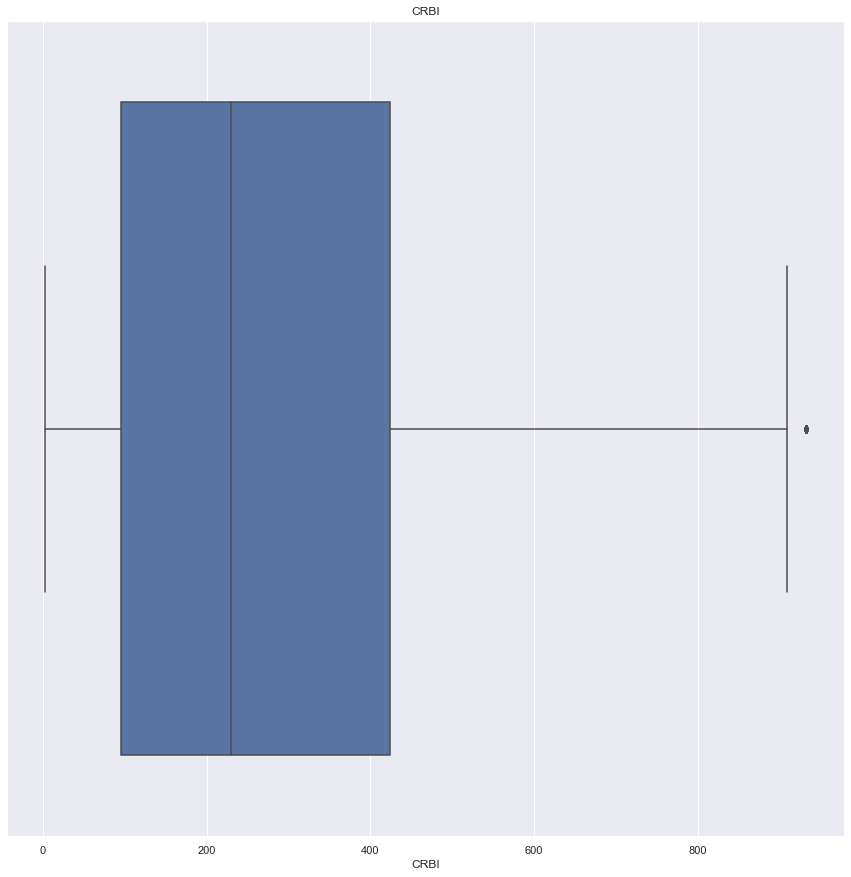

Low: -399.25 Up: 918.75
#######################################


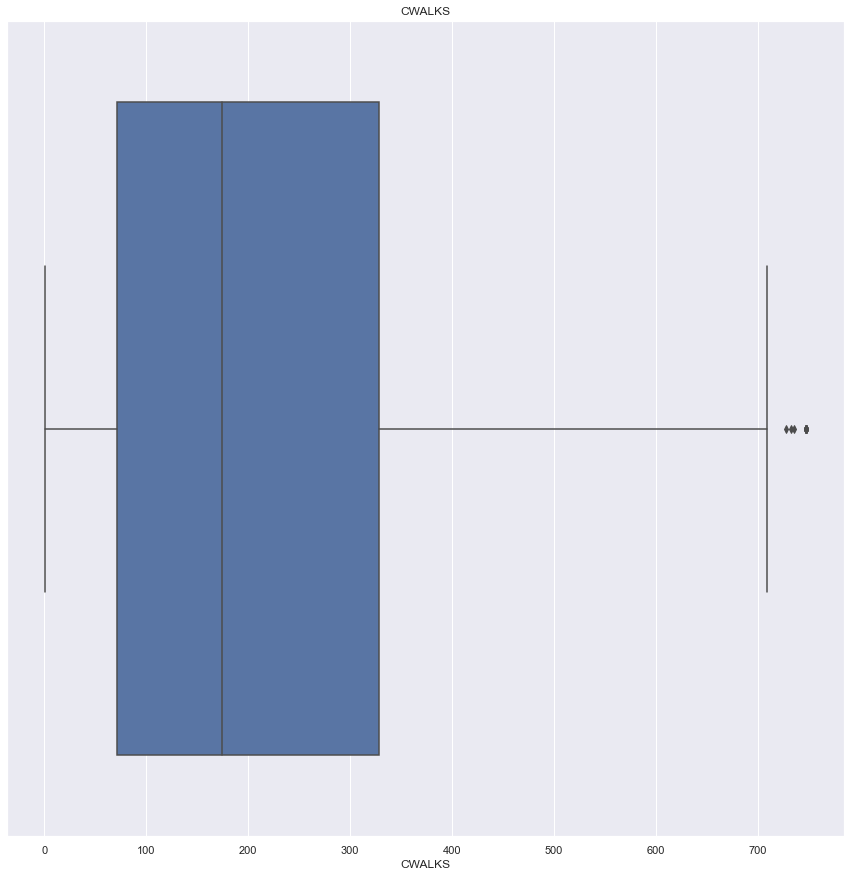

Low: -315.25 Up: 714.75
#######################################


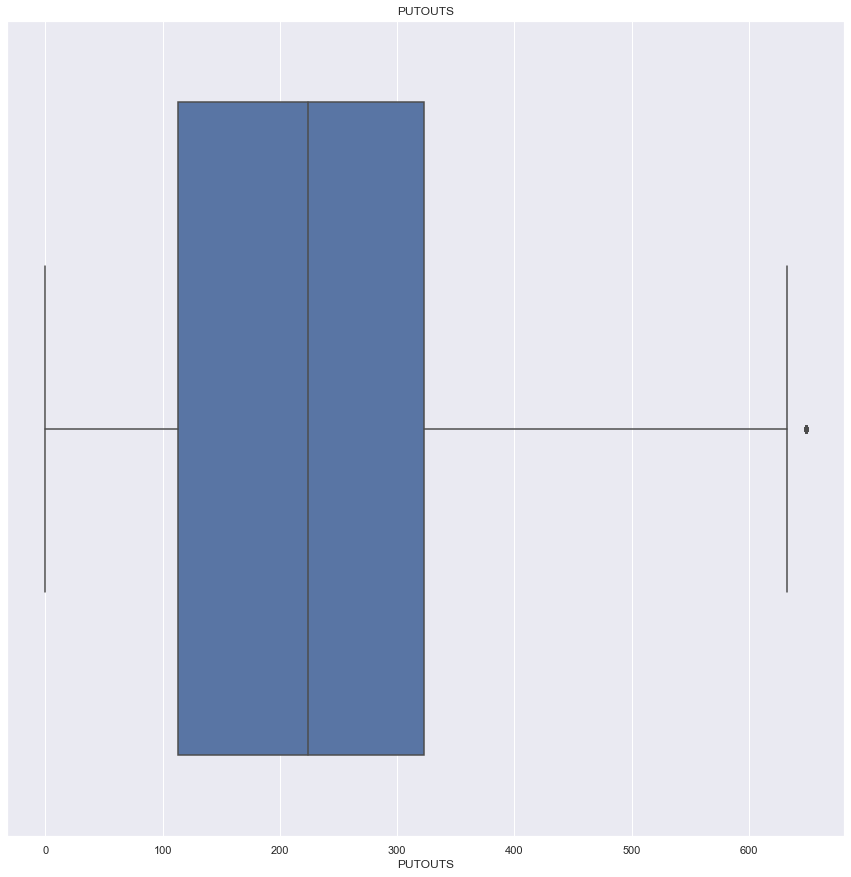

Low: -200.0 Up: 636.0
#######################################


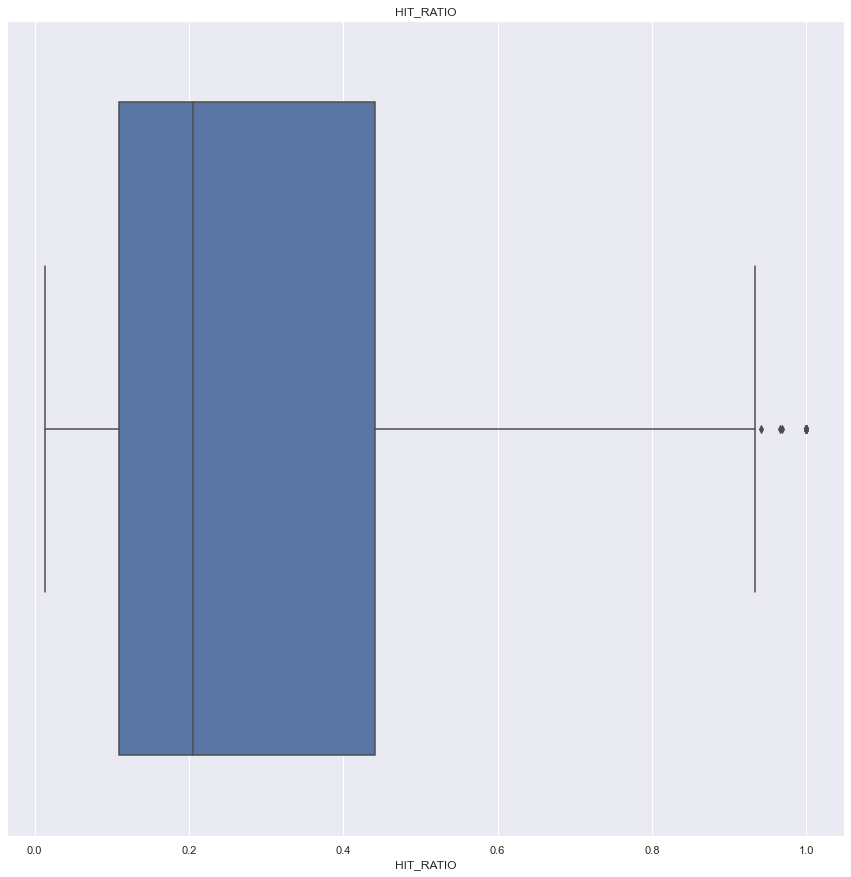

Low: -0.38784864897740184 Up: 0.9392892759665277
#######################################


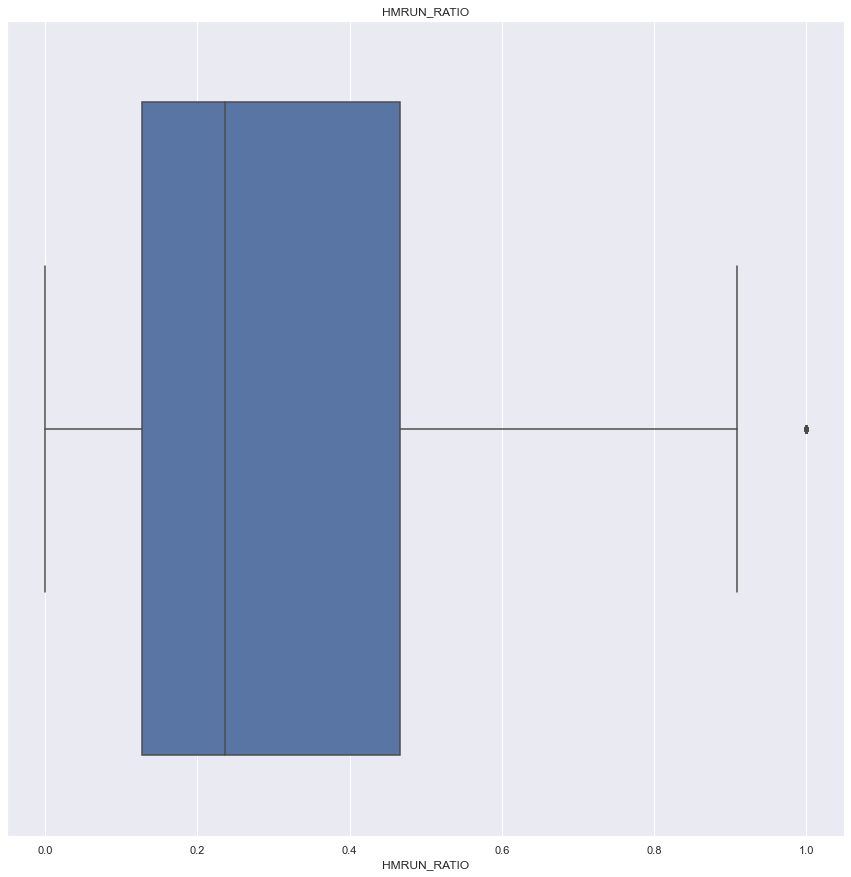

Low: -0.3801645658263306 Up: 0.9734768907563026
#######################################


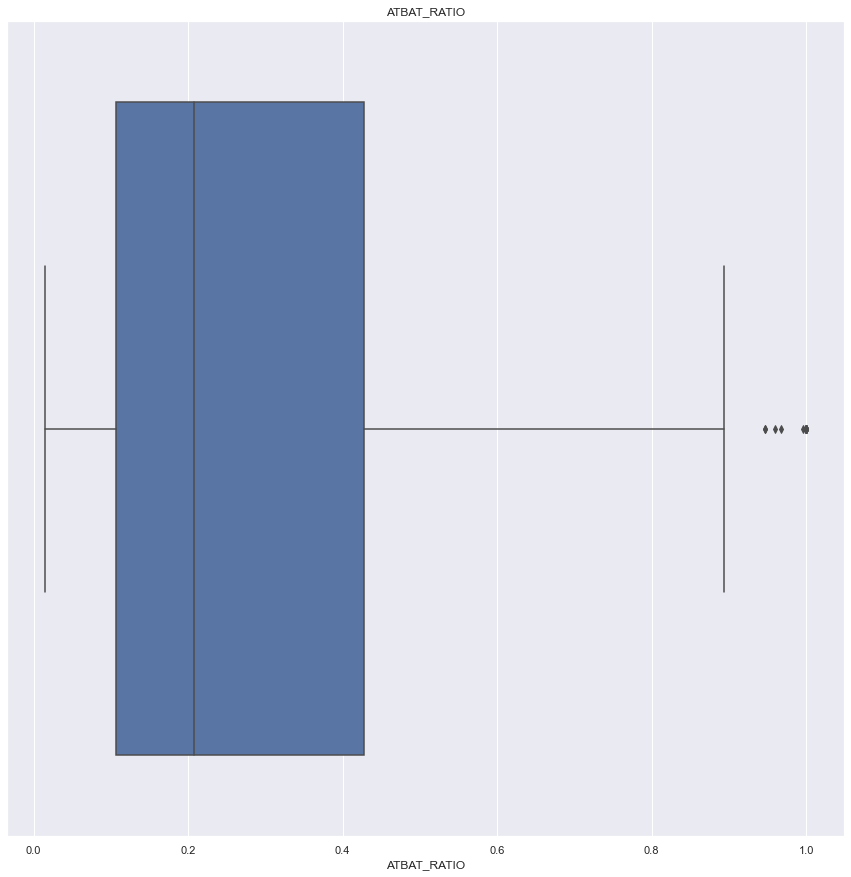

Low: -0.37486355395661053 Up: 0.9089074375785227
#######################################


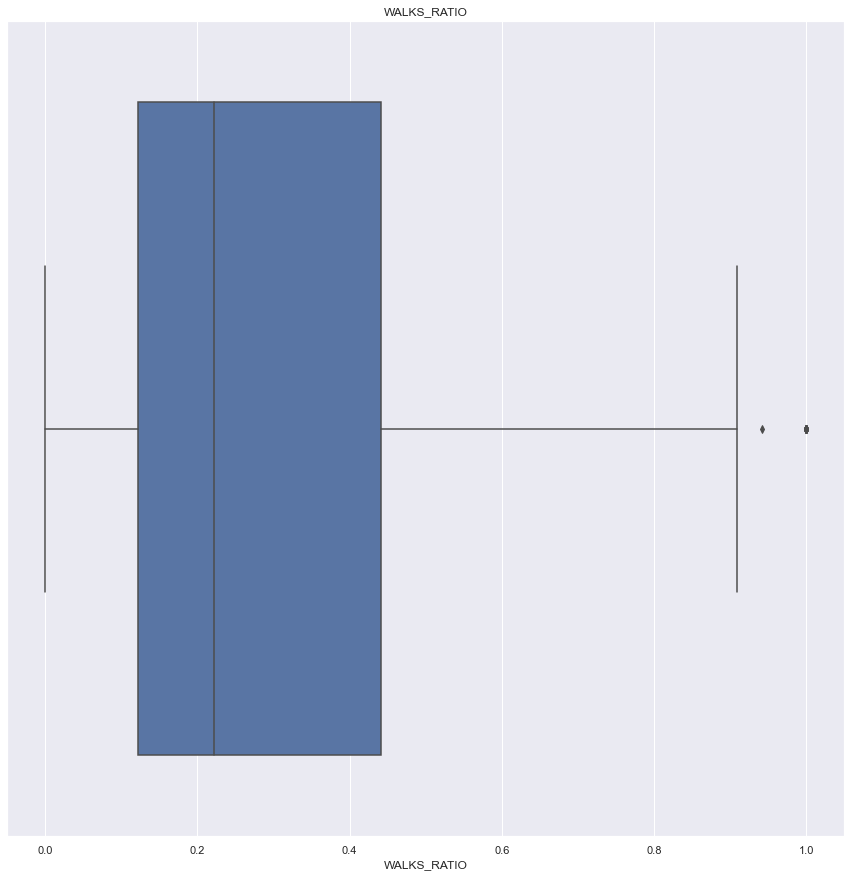

Low: -0.3577763025315648 Up: 0.9216299464952742
#######################################


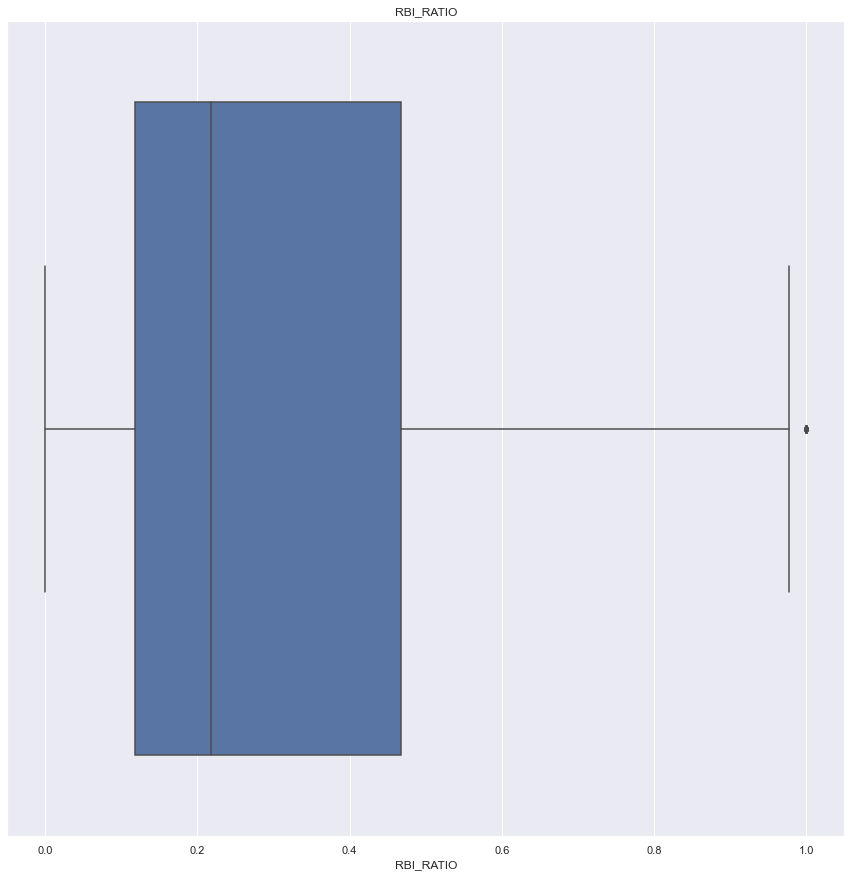

Low: -0.40652451230953646 Up: 0.991738925716011
#######################################


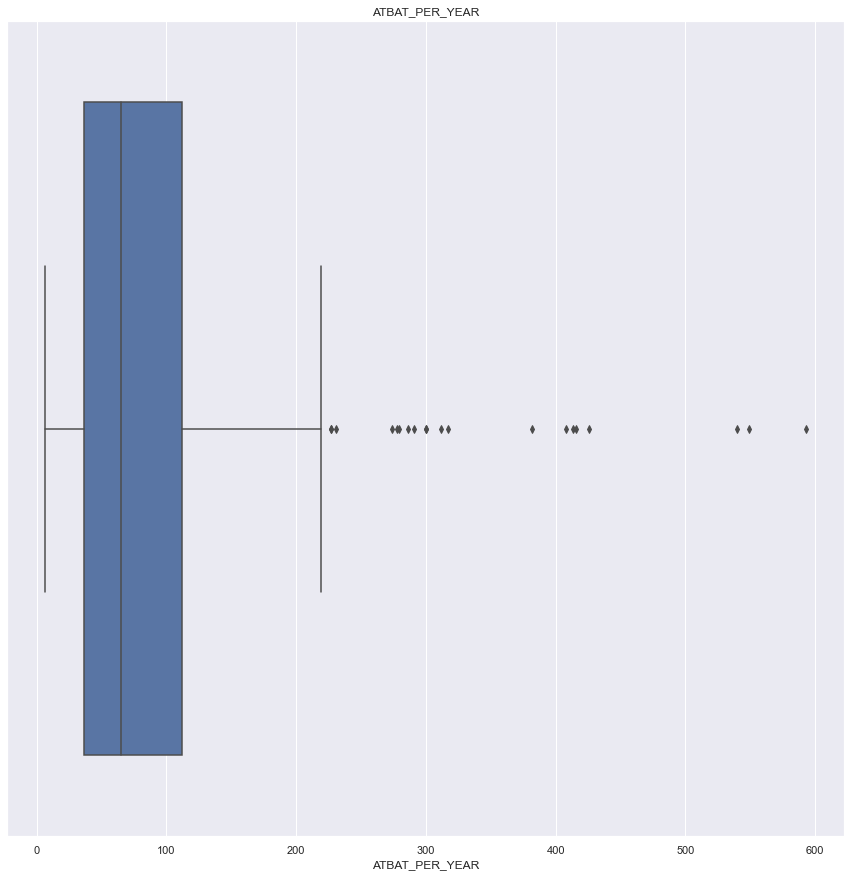

Low: -76.41964285714286 Up: 224.98511904761907
#######################################


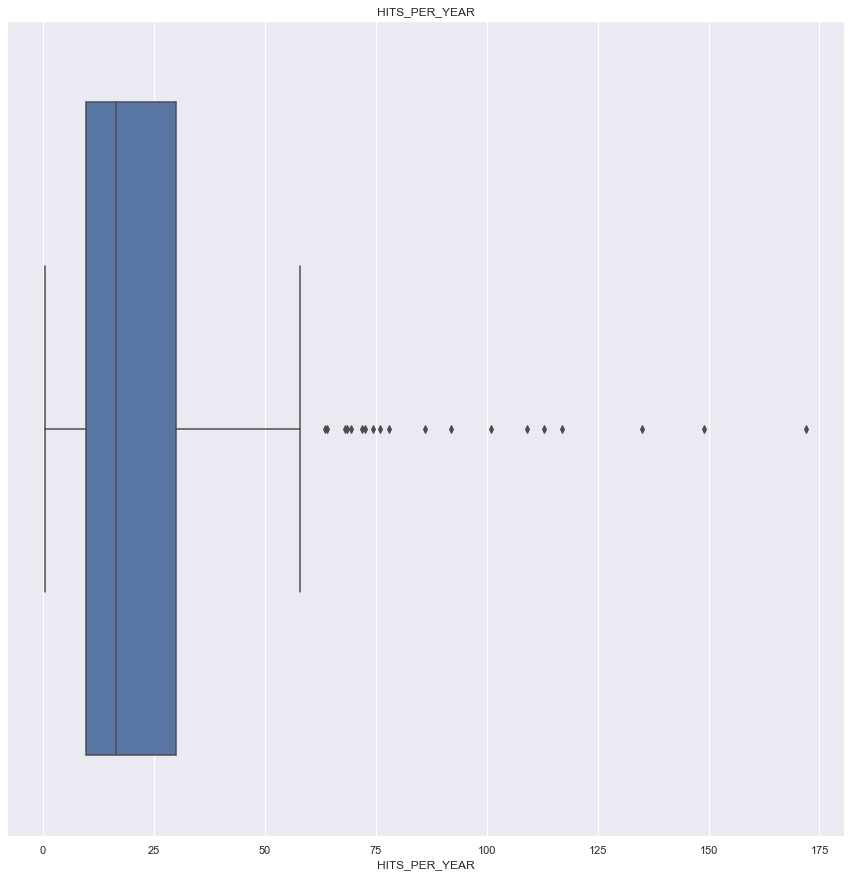

Low: -20.83791208791209 Up: 60.502747252747255
#######################################


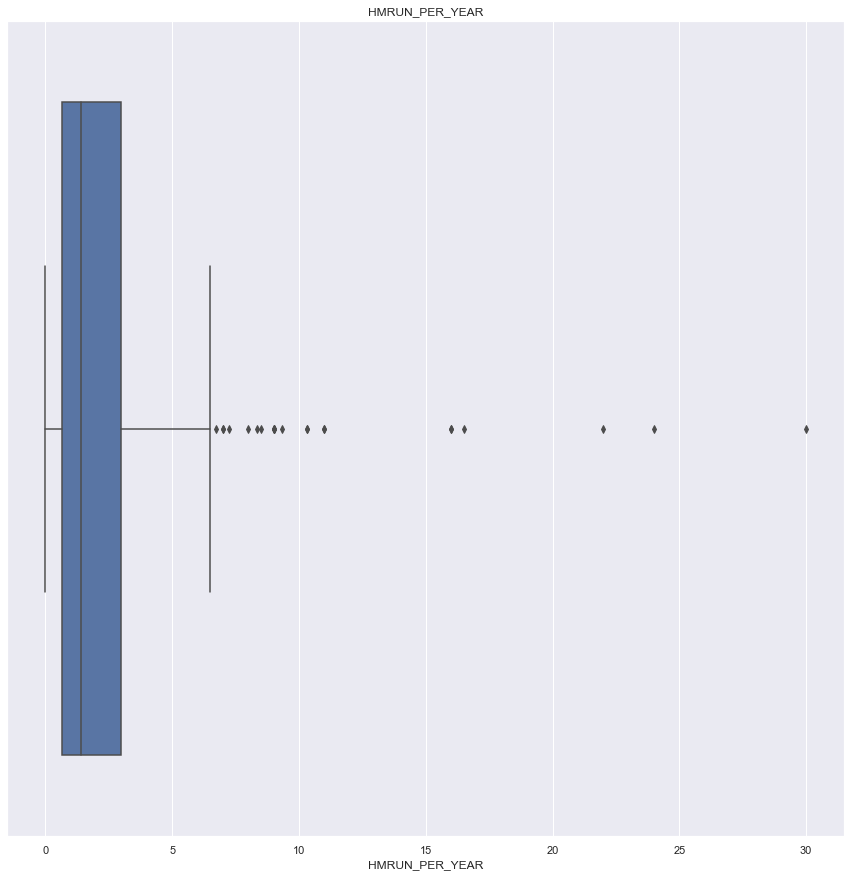

Low: -2.8333333333333335 Up: 6.5
#######################################


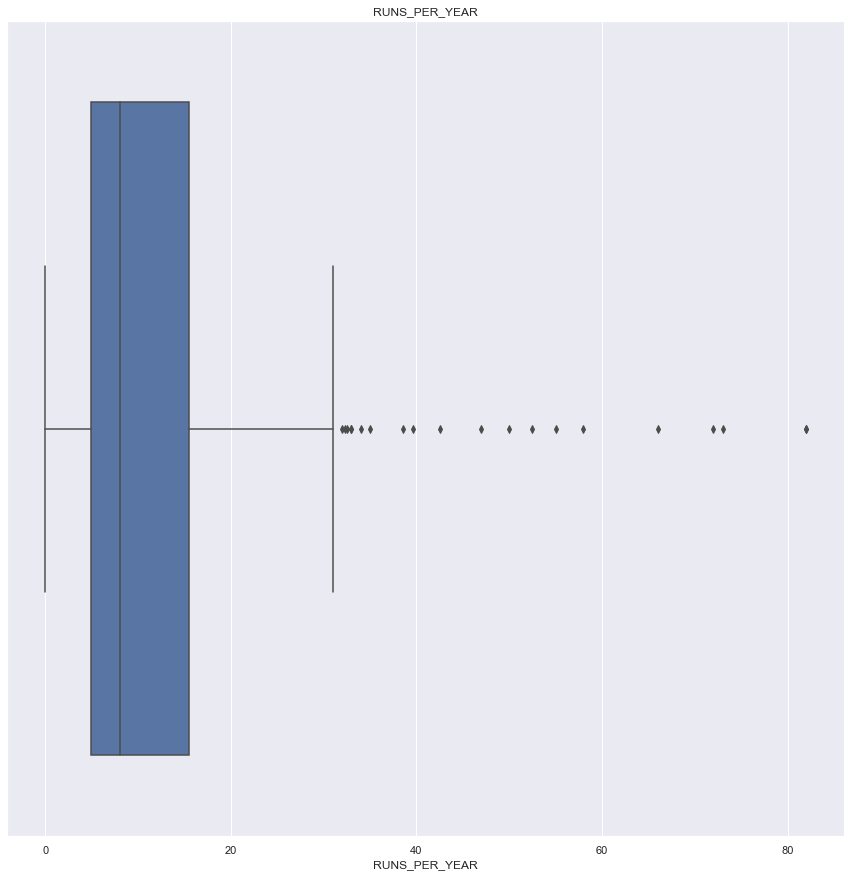

Low: -10.991071428571429 Up: 31.461309523809526
#######################################


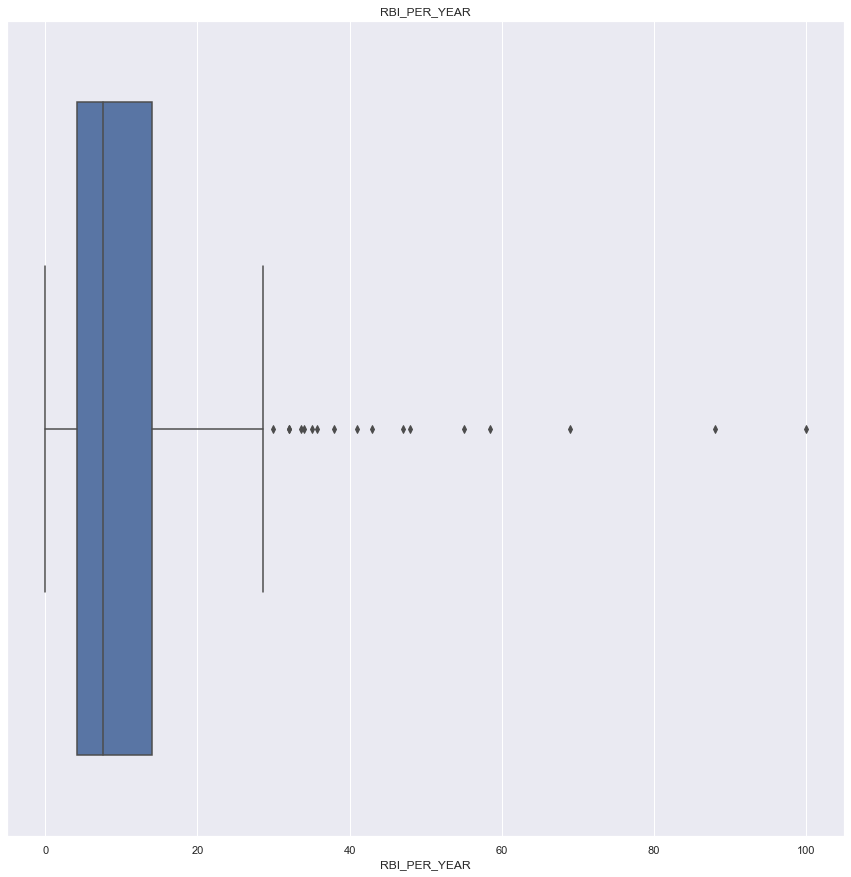

Low: -10.580882352941174 Up: 28.881862745098033
#######################################


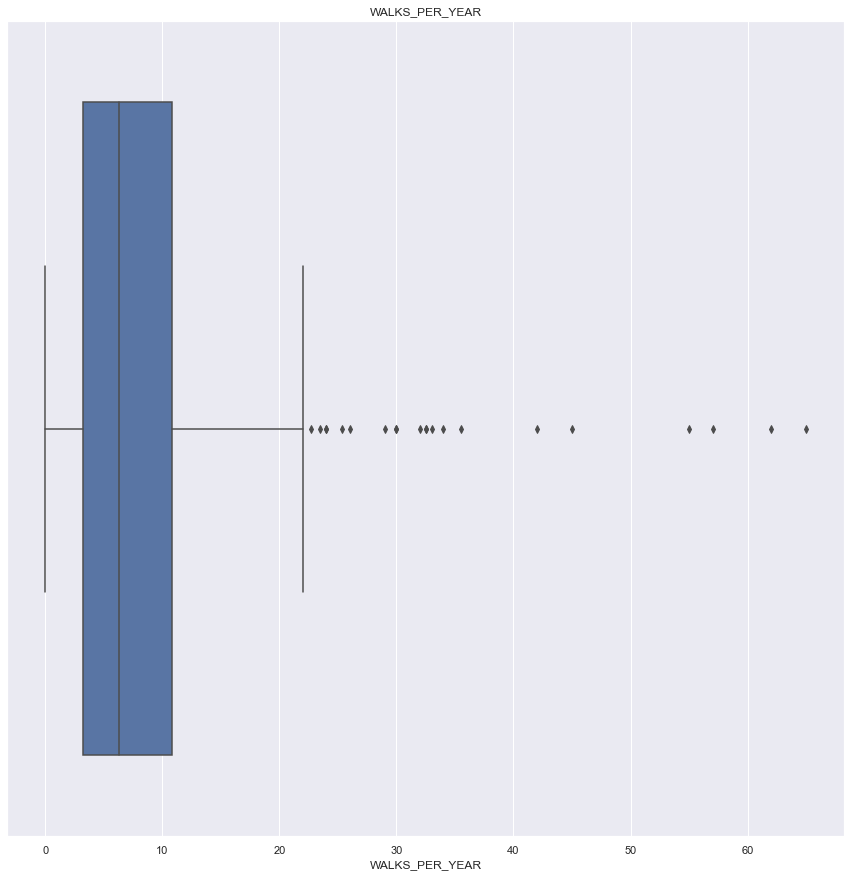

Low: -8.143382352941176 Up: 22.21936274509804
#######################################


In [51]:
for col in num_col:
    outlier_boxplot(df,col)

### Replace with outlier thresholds - 2

In [52]:
for col in num_col:
    df = replace_with_outlier_thresholds(df,col)

In [53]:
for col in num_col:
    print(col,"-",check_outlier(df,col))

ATBAT - False
HITS - False
HMRUN - False
RUNS - False
RBI - False
WALKS - False
YEARS - False
CATBAT - False
CHITS - False
CHMRUN - False
CRUNS - False
CRBI - False
CWALKS - False
PUTOUTS - False
ASSISTS - False
ERRORS - False
SALARY - False
HIT_RATIO - False
HMRUN_RATIO - False
ATBAT_RATIO - False
RUNS_RATIO - False
WALKS_RATIO - False
RBI_RATIO - False
ATBAT_PER_YEAR - False
HITS_PER_YEAR - False
HMRUN_PER_YEAR - False
RUNS_PER_YEAR - False
RBI_PER_YEAR - False
WALKS_PER_YEAR - False


### Drop Na Values

In [54]:
df.isnull().sum()

ATBAT             0
HITS              0
HMRUN             0
RUNS              0
RBI               0
WALKS             0
YEARS             0
CATBAT            0
CHITS             0
CHMRUN            0
CRUNS             0
CRBI              0
CWALKS            0
LEAGUE            0
DIVISION          0
PUTOUTS           0
ASSISTS           0
ERRORS            0
SALARY            0
NEWLEAGUE         0
HIT_RATIO         0
HMRUN_RATIO       3
ATBAT_RATIO       0
RUNS_RATIO        0
WALKS_RATIO       0
RBI_RATIO         0
TRANSFER          0
EXPERIENCE        0
EXP_DIV_CAT       0
ATBAT_PER_YEAR    0
HITS_PER_YEAR     0
HMRUN_PER_YEAR    0
RUNS_PER_YEAR     0
RBI_PER_YEAR      0
WALKS_PER_YEAR    0
dtype: int64

In [55]:
df = df.dropna()

In [56]:
for col in df.columns:
    print(col,"-",check_na_values(df,col))

ATBAT - False
HITS - False
HMRUN - False
RUNS - False
RBI - False
WALKS - False
YEARS - False
CATBAT - False
CHITS - False
CHMRUN - False
CRUNS - False
CRBI - False
CWALKS - False
LEAGUE - False
DIVISION - False
PUTOUTS - False
ASSISTS - False
ERRORS - False
SALARY - False
NEWLEAGUE - False
HIT_RATIO - False
HMRUN_RATIO - False
ATBAT_RATIO - False
RUNS_RATIO - False
WALKS_RATIO - False
RBI_RATIO - False
TRANSFER - False
EXPERIENCE - False
EXP_DIV_CAT - False
ATBAT_PER_YEAR - False
HITS_PER_YEAR - False
HMRUN_PER_YEAR - False
RUNS_PER_YEAR - False
RBI_PER_YEAR - False
WALKS_PER_YEAR - False


# Encoding

In [57]:
def label_encoder(dataframe,binary_col):
    labelencoder=LabelEncoder()
    dataframe[binary_col]=labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols= [col for col in df.columns if df[col].dtype not in ["int64","float64"] and df[col].nunique()==2]
for col in binary_cols:
    df=label_encoder(df,col)

In [58]:
def rare_analyser(dataframe,target,cat_cols):
    for col in cat_cols:
        print(col,":", len(dataframe[col].value_counts())) # Kategorik değişkenler ve bunların eşsiz değer sayısı.
        print(pd.DataFrame({"COUNT":dataframe[col].value_counts(),"RATIO": dataframe[col].value_counts()/len(dataframe),"TARGET_MEAN":dataframe.groupby(col)[target].mean()}),end="\n\n\n")

rare_analyser(df,"SALARY",cat_col)

LEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    138   0.53       527.53
1    122   0.47       521.83


DIVISION : 2
   COUNT  RATIO  TARGET_MEAN
0    128   0.49       597.88
1    132   0.51       454.03


NEWLEAGUE : 2
   COUNT  RATIO  TARGET_MEAN
0    140   0.54       522.81
1    120   0.46       527.23


TRANSFER : 4
         COUNT  RATIO  TARGET_MEAN
A_N          8   0.03       558.12
N_A         10   0.04       486.00
Stand_A    130   0.50       525.65
Stand_N    112   0.43       525.02


EXPERIENCE : 4
               COUNT  RATIO  TARGET_MEAN
Expert_Player     77   0.30       710.93
Junior_Player     16   0.06       154.31
Mid_Player        72   0.28       238.10
Senior_Player     95   0.37       653.77


EXP_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
Expert_East     38   0.15       745.47
Expert_West     39   0.15       677.26
Junior_East      5   0.02        80.00
Junior_West     11   0.04       188.09
Mid_East        34   0.13       261.00
Mid_West        38   0.15       2

In [59]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes=="O" and (temp_df[col].value_counts()/len( temp_df ) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp=temp_df[var].value_counts()/len(temp_df)
        rare_labels=tmp[tmp<rare_perc].index
        temp_df[var]=np.where(temp_df[var].isin(rare_labels), "Rare",temp_df[var])
    return temp_df
df= rare_encoder(df,0.01)

In [60]:
def one_hot_encoder(dataframe, categorical_cols,drop_first=True):
    dataframe=pd.get_dummies(dataframe, columns=categorical_cols,drop_first=drop_first)
    return dataframe

In [61]:
ohe_cols=[col for col in df.columns if 10>= df[col].nunique() > 2]
df=one_hot_encoder(df,ohe_cols)

In [62]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,HIT_RATIO,HMRUN_RATIO,ATBAT_RATIO,RUNS_RATIO,WALKS_RATIO,RBI_RATIO,ATBAT_PER_YEAR,HITS_PER_YEAR,HMRUN_PER_YEAR,RUNS_PER_YEAR,RBI_PER_YEAR,WALKS_PER_YEAR,TRANSFER_N_A,TRANSFER_Stand_A,TRANSFER_Stand_N,EXPERIENCE_Junior_Player,EXPERIENCE_Mid_Player,EXPERIENCE_Senior_Player,EXP_DIV_CAT_Expert_West,EXP_DIV_CAT_Junior_East,EXP_DIV_CAT_Junior_West,EXP_DIV_CAT_Mid_East,EXP_DIV_CAT_Mid_West,EXP_DIV_CAT_Senior_East,EXP_DIV_CAT_Senior_West
1,315,81,7,24.00,38.00,39.00,14.00,3449.00,835.00,69,321.00,414.00,375.00,1,1,632.00,43.00,10,475.00,1,0.10,0.10,0.09,0.07,0.10,0.09,22.50,5.79,0.50,1.71,2.71,2.79,0,0,1,0,0,0,1,0,0,0,0,0,0
2,479,130,18,66.00,72.00,76.00,3.00,1624.00,457.00,63,224.00,266.00,263.00,0,1,636.00,82.00,14,480.00,0,0.28,0.29,0.29,0.29,0.29,0.27,159.67,43.33,6.00,22.00,24.00,22.22,0,1,0,0,1,0,0,0,0,0,1,0,0
3,496,141,20,65.00,78.00,37.00,11.00,5628.00,1575.00,204,828.00,838.00,354.00,1,0,200.00,11.00,3,500.00,1,0.09,0.10,0.09,0.08,0.10,0.09,45.09,12.82,1.82,5.91,7.09,3.36,0,0,1,0,0,0,0,0,0,0,0,0,0
4,321,87,10,39.00,42.00,30.00,2.00,396.00,101.00,12,48.00,46.00,33.00,1,0,636.00,40.00,4,91.50,1,0.86,0.83,0.81,0.81,0.91,0.91,160.50,43.50,5.00,19.50,21.00,15.00,0,0,1,0,1,0,0,0,0,1,0,0,0
5,594,169,4,74.00,51.00,35.00,11.00,4408.00,1133.00,19,501.00,336.00,194.00,0,1,282.00,404.50,23,750.00,0,0.15,0.21,0.13,0.15,0.18,0.15,54.00,15.36,0.36,6.73,4.64,3.18,0,1,0,0,0,0,1,0,0,0,0,0,0


# Model

In [63]:
X = df.drop(["SALARY"],axis = 1)
y = df["SALARY"]

In [64]:
y.shape

(260,)

In [65]:
X.shape

(260, 44)

In [66]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=34)

In [67]:
X_train.shape

(208, 44)

In [68]:
y_test.shape

(52,)

In [69]:
df.shape

(260, 45)

In [70]:
scaler = MinMaxScaler()

In [71]:
model1 = LinearRegression().fit(X_train,y_train)

In [72]:
y_pred = model1.predict(X_train)

### MSE

In [73]:
mean_squared_error(y_train,y_pred)

38126.55916235545

### RMSE

In [74]:
np.sqrt(mean_squared_error(y_train,y_pred))

195.26023446251276

# Score

In [75]:
model1.score(X_train,y_train)

0.7538248866891749

# Predict

In [76]:
y_pred_test = model1.predict(X_test)

In [77]:
#MSE
mean_squared_error(y_test,y_pred_test)

45744.648204971214

In [78]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_test))

213.87998551751215

In [79]:
#Score
model1.score(X_test,y_test)

0.737577745009566

      Value                   Feature
21  2381.34               ATBAT_RATIO
34   272.67  EXPERIENCE_Junior_Player
38   184.87   EXP_DIV_CAT_Junior_East
42   120.36   EXP_DIV_CAT_Senior_East
39    87.80   EXP_DIV_CAT_Junior_West
18    73.96                 NEWLEAGUE
36    68.44  EXPERIENCE_Senior_Player
40    33.60      EXP_DIV_CAT_Mid_East
27    32.37            HMRUN_PER_YEAR
14    26.77                  DIVISION
35    25.49     EXPERIENCE_Mid_Player
20    18.02               HMRUN_RATIO
28     6.20             RUNS_PER_YEAR
1      4.92                      HITS
4      3.42                       RBI
5      2.76                     WALKS
10     1.06                     CRUNS
11     0.59                      CRBI
8      0.39                     CHITS
15     0.32                   PUTOUTS
2      0.29                     HMRUN
16     0.04                   ASSISTS
12    -0.03                    CWALKS
17    -0.18                    ERRORS
7     -0.22                    CATBAT
9     -0.30 

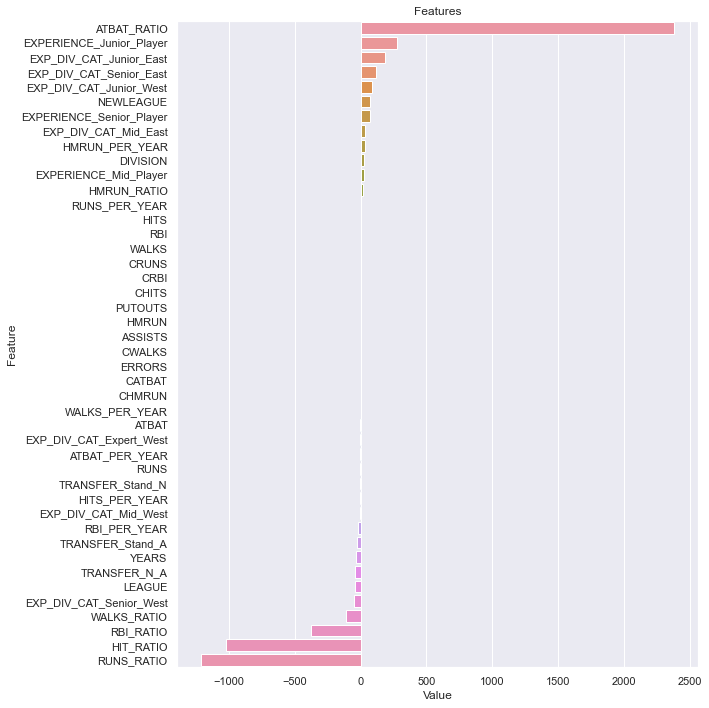

<Figure size 1080x1080 with 0 Axes>

In [80]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.coef_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value", ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(model1,X,save = True)